In [ ]:
%pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 23.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap
import matplotlib.pyplot as plt

df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

def compute_fingerprint(smiles, radius=2, nBits=256):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    return None

df_collected['fingerprint'] = df_collected['smiles'].apply(compute_fingerprint)
df_generated['fingerprint'] = df_generated['Smiles'].apply(compute_fingerprint)

df_collected = df_collected.dropna(subset=['fingerprint'])
df_generated = df_generated.dropna(subset=['fingerprint'])

fingerprints = np.array(df_collected['fingerprint'].tolist() + df_generated['fingerprint'].tolist())
labels = ['collected'] * len(df_collected) + ['generated'] * len(df_generated)

umap_reducer = umap.UMAP(metric='hamming', random_state=42)
umap_embedding = umap_reducer.fit_transform(fingerprints)

plt.figure(figsize=(10, 7))
colors = {'collected': 'pink', 'generated': 'gray'}

for label in set(labels):
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1],
                s=10, alpha=0.7, label=label, color=colors[label])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Groups")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap
import matplotlib.pyplot as plt

# Загрузка данных
df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

# Функция для создания Morgan fingerprints
def compute_fingerprint(smiles, radius=2, nBits=256):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    return None

# Вычисление Morgan fingerprints для обеих таблиц
df_collected['fingerprint'] = df_collected['smiles'].apply(compute_fingerprint)
df_generated['fingerprint'] = df_generated['Smiles'].apply(compute_fingerprint)

# Удаляем строки с None в fingerprints
df_collected = df_collected.dropna(subset=['fingerprint'])
df_generated = df_generated.dropna(subset=['fingerprint'])

# Объединяем фингерпринты для UMAP
fingerprints = np.array(df_collected['fingerprint'].tolist() + df_generated['fingerprint'].tolist())
labels = ['collected'] * len(df_collected) + ['generated'] * len(df_generated)

# Построение UMAP с метрикой Jaccard
umap_reducer = umap.UMAP(metric='jaccard', random_state=42)
umap_embedding = umap_reducer.fit_transform(fingerprints)

# Визуализация UMAP
plt.figure(figsize=(10, 7))
colors = {'collected': 'pink', 'generated': 'gray'}

for label in set(labels):
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1],
                s=10, alpha=0.7, label=label, color=colors[label])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Groups")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap
import matplotlib.pyplot as plt

# Загрузка данных
df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

# Функция для создания Morgan fingerprints
def compute_fingerprint(smiles, radius=2, nBits=256):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    return None

# Вычисление Morgan fingerprints для обеих таблиц
df_collected['fingerprint'] = df_collected['smiles'].apply(compute_fingerprint)
df_generated['fingerprint'] = df_generated['Smiles'].apply(compute_fingerprint)

# Удаляем строки с None в fingerprints
df_collected = df_collected.dropna(subset=['fingerprint'])
df_generated = df_generated.dropna(subset=['fingerprint'])

# Объединяем фингерпринты для UMAP
fingerprints = np.array(df_collected['fingerprint'].tolist() + df_generated['fingerprint'].tolist())
labels = ['collected'] * len(df_collected) + ['generated'] * len(df_generated)

# Построение UMAP с метрикой Rogers-Tanimoto
umap_reducer = umap.UMAP(metric='rogerstanimoto', random_state=42)
umap_embedding = umap_reducer.fit_transform(fingerprints)

# Визуализация UMAP
plt.figure(figsize=(10, 7))
colors = {'collected': 'pink', 'generated': 'gray'}

for label in set(labels):
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1],
                s=10, alpha=0.7, label=label, color=colors[label])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Groups")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap
import matplotlib.pyplot as plt

# Загрузка данных
df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

# Функция для создания Morgan fingerprints
def compute_fingerprint(smiles, radius=2, nBits=256):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    return None

# Вычисление Morgan fingerprints для обеих таблиц
df_collected['fingerprint'] = df_collected['smiles'].apply(compute_fingerprint)
df_generated['fingerprint'] = df_generated['Smiles'].apply(compute_fingerprint)

# Удаляем строки с None в fingerprints
df_collected = df_collected.dropna(subset=['fingerprint'])
df_generated = df_generated.dropna(subset=['fingerprint'])

# Объединяем фингерпринты для UMAP
fingerprints = np.array(df_collected['fingerprint'].tolist() + df_generated['fingerprint'].tolist())
labels = ['collected'] * len(df_collected) + ['generated'] * len(df_generated)

# Построение UMAP с метрикой Yule
umap_reducer = umap.UMAP(metric='yule', random_state=42)
umap_embedding = umap_reducer.fit_transform(fingerprints)

# Визуализация UMAP
plt.figure(figsize=(10, 7))
colors = {'collected': 'pink', 'generated': 'gray'}

for label in set(labels):
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1],
                s=10, alpha=0.7, label=label, color=colors[label])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Groups")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import os

file_names = [
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv'
]

data = []

for file_name in file_names:
    df = pd.read_csv(file_name)

    if not df.empty:
        short_file_name = os.path.basename(file_name)

        df['file name'] = short_file_name

        filtered_rows = []
        for _, row in df.iterrows():
            try:
                int(row['Epoch'])
                filtered_rows.append(row)
            except ValueError:
                pass

        filtered_df = pd.DataFrame(filtered_rows)

        data.append(filtered_df)
    else:
        print(f"Файл {file_name} пуст.")

combined_df = pd.concat(data, ignore_index=True)

combined_df.head()

combined_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/all_mols.csv', index=False)

In [ ]:
combined_df.head()

,Smiles,LogPProperty,HeavyAtomCountProperty,NumHAcceptorsProperty,NumHDonorsProperty,PAINSProperty,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,...,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,Reward,file_name
0,NC(=O)Nc1cc(-c2cc(-c3ccc4cc[nH]c4c3)ccc2-c2nnc...,4.0305,29,6,3,0,0,0,-12.0,-12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NC(=O)Nc1nnc(-c2cccc(-c3cc4c(c(-c5ccc6cc[nH]c6...,4.7712,33,6,3,0,0,0,-11.0,-9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NC(=O)Nc1nnc(-c2ccc(-c3ccc4c(c3)OCCO4)c(-c3ccc...,4.8806,35,7,2,0,0,0,-9.9,-11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC(=O)Nc1nnc(-c2cccc(-c3ccc4c(-c5ccc6c(c5)OCO6...,4.7712,33,6,3,0,0,0,-10.8,-12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC(=O)Nc1cc(NC(=O)Nc2cccc3cccnc23)ccc1-c1c[nH]...,5.5177,33,3,5,0,0,0,-8.8,-11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter

In [ ]:
filtered_df = combined_df[(combined_df['Epoch'] >= 150) & (combined_df['Epoch'] <= 199)]
filtered_df.head()
filtered_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/combined_new_train_data.csv', index=False)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
smiles_list = df['molecule (Canonical/Isomeric SMILES)'].tolist()

In [ ]:
import json

with open("/content/drive/MyDrive/Project/sample_200_4.json", "r") as file:
    smiles_list = json.load(file)

In [ ]:
import pandas as pd
import os

file_paths = [
    "/content/drive/MyDrive/Project/sample_200_hybrids1_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrids2_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrid4_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrids5_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrids6_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrids7_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrid8_results.csv",
    "/content/drive/MyDrive/Project/sample_200_hybrid10_results.csv"
]

dfs = []

for file_path in file_paths:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dfs.append(df)

big_df = pd.concat(dfs, ignore_index=True)

merged_output_file = "/content/drive/MyDrive/Project/merged_hybrid_results.csv"
big_df.to_csv(merged_output_file, index=False)

print(f"Объединенные результаты сохранены в файл: {merged_output_file}")

Объединенные результаты сохранены в файл: /content/drive/MyDrive/Project/merged_hybrid_results.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/sample_200_benzimidazole_results.csv')
filtered_df = df[(df['Lipinski Rule of Five']) & (df['ADMET Score'] == 1)]

filtered_df = filtered_df[filtered_df['Lipinski Rule of Three']]

filtered_df['Bioactivity'] = 10 ** filtered_df['Bioactivity']

filtered_output_file = "/content/drive/MyDrive/Project/filtered_benzimidazole_results2.csv"
filtered_df.to_csv(filtered_output_file, index=False)

print(f"Отфильтрованные результаты сохранены в файл: {filtered_output_file}")


Отфильтрованные результаты сохранены в файл: /content/drive/MyDrive/Project/filtered_benzimidazole_results2.csv


In [ ]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

with open("/content/drive/MyDrive/Project/hist_gradient_boosting_model.pkl", "rb") as f:
    model = pickle.load(f)

def get_fingerprint(mol):
    """Конвертирует SMILES в отпечаток Morgan."""
    fp_array = np.zeros((512,), dtype=np.int8)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def predict_mic(smiles, model):
    """Возвращает предсказанный MIC для молекулы."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = get_fingerprint(mol)
    mic = model.predict([fp])
    return mic[0]

df = pd.read_csv("/content/drive/MyDrive/Project/merged_hybrid_results.csv")

df['Predicted MIC'] = df['SMILES'].apply(lambda x: predict_mic(x, model))

df = df.drop(columns=['Bioactivity'])

print(df.head())

[19:02:45] DEPRECATION WARNING: please use MorganGenerator


ValueError: X has 512 features, but HistGradientBoostingRegressor is expecting 256 features as input.

In [ ]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

with open("/content/drive/MyDrive/Project/hist_gradient_boosting_model.pkl", "rb") as f:
    model = pickle.load(f)

def get_fingerprint(mol):
    fp_array = np.zeros((256,), dtype=np.int8)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=256)
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def predict_mic(smiles, model):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = get_fingerprint(mol)
    mic = model.predict([fp])
    return mic[0]

df = pd.read_csv("/content/drive/MyDrive/Project/merged_hybrid_results.csv")

df['Predicted MIC'] = df['SMILES'].apply(lambda x: predict_mic(x, model))
df['Predicted MIC (log)'] = 10**df['Predicted MIC']

df = df.drop(columns=['Bioactivity'])

df.to_csv("updated_merged_dataset.csv", index=False)

df.head()


In [ ]:
df.to_csv("updated_merged_dataset.csv", index=False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Project/updated_merged_dataset.csv", index=False)

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors, QED


df = pd.read_csv("/content/drive/MyDrive/Project/updated_merged_dataset.csv")

def calculate_sascore(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return QED.qed(mol)

df = pd.read_csv('/content/drive/MyDrive/Project/updated_merged_dataset.csv')

df['SAScore'] = df['SMILES'].apply(calculate_sascore)

df.to_csv("/content/drive/MyDrive/Project/updated_merged_dataset_with_sascore.csv", index=False)

print(df.head())

                                              SMILES  QED Score  ADMET Score  \
0  C=Nc1nnc(C(=N)C(=O)c2c(N3CCN(c4nc5ccccc5[nH]4)...   0.170345            0   
1  N=C(NC(=O)NNC(N)=O)C(=N)c1c(N2CCN(c3nc4ccccc4[...   0.092932            0   
2  N=Cc1nnc(C(=O)C(=O)C(=N)c2c(N3CCN(c4nc5ccccc5[...   0.100127            0   
3  NC(=O)NC=Nc1nnc(C(=O)C(=O)c2c(N3CCN(c4nc5ccccc...   0.071739            0   
4  NC(=O)NC(C=O)C(N)c1c(N2CCN(c3nc4ccccc4[nH]3)CC...   0.184638            0   

   Lipinski Rule of Five  Lipinski Rule of Three  Predicted MIC  \
0                  False                   False       0.723214   
1                  False                   False       1.097686   
2                  False                   False       0.299884   
3                  False                   False       0.956369   
4                  False                   False       1.423055   

   Predicted MIC (log)   SAScore  
0             5.287060  0.170345  
1            12.522345  0.092932  
2          

In [ ]:
mean_qed = df['QED Score'].mean()
mean_sascore = df['SAScore'].mean()
mean_predicted_mic_log = df['Predicted MIC (log)'].mean()

print(f"Среднее значение для QED Score: {mean_qed:.4f}")
print(f"Среднее значение для SAScore: {mean_sascore:.4f}")
print(f"Среднее значение для Predicted MIC (log): {mean_predicted_mic_log:.4f}")


Среднее значение для QED Score: 0.2106
Среднее значение для SAScore: 0.2106
Среднее значение для Predicted MIC (log): 27.3957


In [ ]:
filtered_df = df[(df['QED Score'] > 0.3) &
                 (df['SAScore'] > 0.3) &
                 (df['Predicted MIC (log)'] < 21) &
                 (df['Lipinski Rule of Five'] == True)]

len(filtered_df)

37

In [ ]:
filtered_df.to_csv("/content/drive/MyDrive/Project/updated_filtered_dataset.csv", index=False)


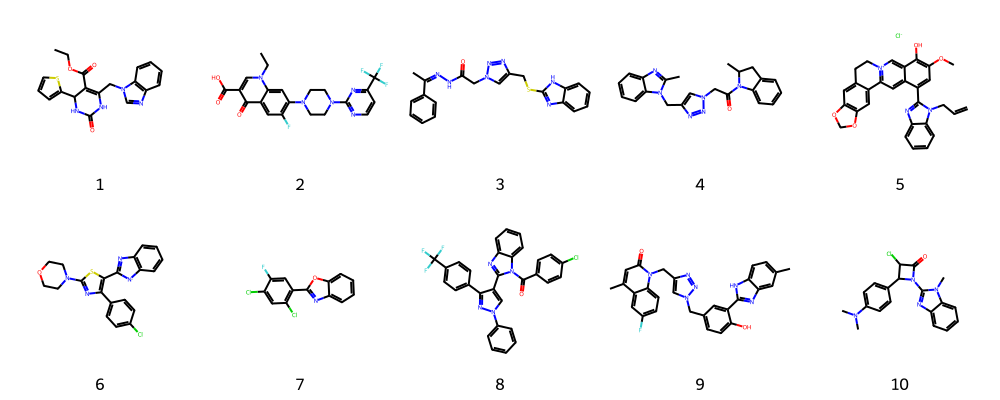

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

smiles_list = [
    "O=C(OCC)C1=C(N(C(=O)N(C1C2=CC=CS2)[H])[H])C[N]3C=NC4=C3C=CC=C4",
    "CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCN(CC3)C4=NC=CC(=N4)C(F)(F)F)F)C(=O)O",
    "O=C(NN=C(C=1C=CC=CC1)C)CN2N=NC(=C2)CSC3=NC=4C=CC=CC4N3",
    "O=C(N1C=2C=CC=CC2CC1C)CN3N=NC(=C3)CN4C(=NC=5C=CC=CC54)C",
    "[Cl-].OC=1C(OC)=CC(C2=NC=3C=CC=CC3N2CC=C)=C4C=C5C=6C=C7OCOC7=CC6CC[N+]5=CC14",
    "C1=CC5=C(C=C1)N=C(C3=C(C2=CC=C(C=C2)Cl)N=C(S3)N4CCOCC4)[N]5",
    "FC=1C=C(C(Cl)=CC1Cl)C2=NC=3C=CC=CC3O2",
    "O=C(C1=CC=C(Cl)C=C1)N2C(=NC=3C=CC=CC32)C4=CN(N=C4C=5C=CC(=CC5)C(F)(F)F)C=6C=CC=CC6",
    "O=C1C=C(C=2C=C(F)C=CC2N1CC=3N=NN(C3)CC=4C=CC(O)=C(C4)C5=NC6=CC(=CC=C6N5)C)C",
    "O=C1N(C2=NC=3C=CC=CC3N2C)C(C4=CC=C(C=C4)N(C)C)C1Cl"
]

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

legends = [str(i + 1) for i in range(len(mols))]

img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=legends)

display(img)


In [ ]:
import pandas as pd
import os

csv_files = [
    "/content/drive/MyDrive/Project/train_000.csv",
    "/content/drive/MyDrive/Project/train_000_10.csv",
    "/content/drive/MyDrive/Project/train_000_5.csv",
    "/content/drive/MyDrive/Project/train_000_6.csv",
    "/content/drive/MyDrive/Project/train_000_7.csv",
    "/content/drive/MyDrive/Project/train_000_8.csv",
    "/content/drive/MyDrive/Project/train_000_hybrids2.csv",
    "/content/drive/MyDrive/Project/train_000_2.csv",
    "/content/drive/MyDrive/Project/train_000_3.csv",
    "/content/drive/MyDrive/Project/train_000_4.csv"
]

combined_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.to_csv("/content/drive/MyDrive/Project/combined_train_000_file.csv", index=False)

print("Объединение завершено. Файл сохранен как 'combined_train_000_file.csv'.")


Объединение завершено. Файл сохранен как 'combined_train_000_file.csv'.


In [ ]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

with open("/content/drive/MyDrive/Project/hist_gradient_boosting_model.pkl", "rb") as f:
    model = pickle.load(f)

def get_fingerprint(mol):
    """Конвертирует SMILES в отпечаток Morgan размером 256 бит."""
    fp_array = np.zeros((256,), dtype=np.int8)  # Размер массива для отпечатка Morgan
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=256)  # Размер отпечатка: 256 бит
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def predict_mic(smiles, model):
    """Возвращает предсказанный MIC для молекулы."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = get_fingerprint(mol)
    mic = model.predict([fp])
    return mic[0]

df = pd.read_csv("/content/drive/MyDrive/Project/combined_train_000_file.csv")

df['Predicted MIC'] = df['Smiles'].apply(lambda x: predict_mic(x, model))
df['Predicted MIC (log)'] = 10**df['Predicted MIC']

# df = df.drop(columns=['Bioactivity'])

df.to_csv("/content/drive/MyDrive/Project/updated_combined_train_000.csv", index=False)

df.head()

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.DataStructs import ConvertToNumpyArray

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv')

def get_fingerprint(mol):
    """Converts SMILES into Morgan fingerprint."""
    fp_array = np.zeros((512,), dtype=np.int8)  # Corrected the array size
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)  # Corrected the number of bits
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def check_qed(mol):
    """Calculates QED-score."""
    return Descriptors.qed(mol)

def check_lipinski(mol):
    """Checks Lipinski's rule of five for drug-like molecules."""
    return Lipinski.NumHDonors(mol) < 5 and \
           Lipinski.NumHAcceptors(mol) < 10 and \
           Descriptors.MolWt(mol) < 500 and \
           Descriptors.MolLogP(mol) < 5

def check_lipinski_ro3(mol):
    """Checks Lipinski's rule of three for lead-like molecules."""
    return Lipinski.NumHDonors(mol) < 3 and \
           Lipinski.NumHAcceptors(mol) < 3 and \
           Descriptors.MolWt(mol) < 300 and \
           Descriptors.MolLogP(mol) < 3

def calculate_admet_score(mol):
    if mol is None:
        return None

    # Lipinski's rule of five
    num_h_donors = Lipinski.NumHDonors(mol)
    num_h_acceptors = Lipinski.NumHAcceptors(mol)
    mol_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)

    # Topological Polar Surface Area (TPSA)
    tpsa = Descriptors.TPSA(mol)

    # Number of rotatable bonds
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)

    # Calculate ADMET score
    admet_score = 0
    if num_h_donors <= 5 and \
       num_h_acceptors <= 10 and \
       mol_weight <= 500 and \
       logp <= 5 and \
       tpsa <= 140 and \
       num_rotatable_bonds <= 10:
        admet_score = 1

    return admet_score

def process_molecule(smiles, model):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed_score = check_qed(mol)
        # admet_score = calculate_admet_score(mol)
        lipinski_pass = check_lipinski(mol)
        lipinski_ro3_pass = check_lipinski_ro3(mol)
        return lipinski_pass, lipinski_ro3_pass
    else:
        return None, None, None

df['QED Score'] = None
# df['ADMET Score'] = None
df['Lipinski Rule of Five'] = None
df['Lipinski Rule of Three'] = None

for index, row in df.iterrows():
    smiles = row['Smiles']
    qed_score, lipinski_pass, lipinski_ro3_pass = process_molecule(smiles, model=None)

    df.at[index, 'QED Score'] = qed_score
    # df.at[index, 'ADMET Score'] = admet_score
    df.at[index, 'Lipinski Rule of Five'] = lipinski_pass
    df.at[index, 'Lipinski Rule of Three'] = lipinski_ro3_pass


df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv', index=False)
df.head()

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.DataStructs import ConvertToNumpyArray

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv')

def get_fingerprint(mol):
    """Converts SMILES into Morgan fingerprint."""
    fp_array = np.zeros((512,), dtype=np.int8)  # Corrected the array size
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)  # Corrected the number of bits
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def check_qed(mol):
    """Calculates QED-score."""
    return Descriptors.qed(mol)

def check_lipinski(mol):
    """Checks Lipinski's rule of five for drug-like molecules."""
    return Lipinski.NumHDonors(mol) < 5 and \
           Lipinski.NumHAcceptors(mol) < 10 and \
           Descriptors.MolWt(mol) < 500 and \
           Descriptors.MolLogP(mol) < 5

def check_lipinski_ro3(mol):
    """Checks Lipinski's rule of three for lead-like molecules."""
    return Lipinski.NumHDonors(mol) < 3 and \
           Lipinski.NumHAcceptors(mol) < 3 and \
           Descriptors.MolWt(mol) < 300 and \
           Descriptors.MolLogP(mol) < 3

def process_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed_score = check_qed(mol)
        lipinski_pass = check_lipinski(mol)
        lipinski_ro3_pass = check_lipinski_ro3(mol)
        return qed_score, lipinski_pass, lipinski_ro3_pass
    else:
        return None, None, None

df['QED Score'] = None
df['Lipinski Rule of Five'] = None
df['Lipinski Rule of Three'] = None

for index, row in df.iterrows():
    smiles = row['Smiles']
    qed_score, lipinski_pass, lipinski_ro3_pass = process_molecule(smiles)

    df.at[index, 'QED Score'] = qed_score
    df.at[index, 'Lipinski Rule of Five'] = lipinski_pass
    df.at[index, 'Lipinski Rule of Three'] = lipinski_ro3_pass

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv', index=False)


In [ ]:
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,DockingScore1Property,DockingScore2Property,Epoch,SAScore,Predicted MIC (log),Predicted MIC,ADMET Score,QED Score,Lipinski Rule of Five,Lipinski Rule of Three
0,O=[SH]c1ccc2c(c1)C1C=CCC1C(c1cc(C(O)F)c3cccnc3...,-0.585900000000005,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,9.1,7.5,...,-9.1,-7.5,0,9.220544,-1.056913,0.087718,0.340109,0.273616,False,False
1,CN(C)c1cc(-c2cccc(Cl)c2)c2ncc(NCC=O)c(C3CCCC3O...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,7.5,9.9,...,-7.5,-9.9,0,9.094757,-1.365258,0.043126,0.368743,0.554041,True,False
2,C=CCOc1cc2nccc(COC)c2c(OC(C)C=O)c1-c1ccccn1,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.0,6.2,...,-6.0,-6.2,0,8.987137,-1.702320,0.019846,0.407408,0.414382,True,False
3,CNC(C)(C)c1c(C#N)ccc2nccc(C3CCCNC3)c12,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,9.1,...,-6.0,-9.1,0,8.930350,-1.565128,0.027219,0.540615,0.914765,True,False
4,N#Cc1cc(C2CC2)cc2nc(C3CCCC3)c(-c3cccc(Cl)c3)cc12,-1.9618800000000052,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.9,8.9,...,-7.9,-8.9,0,8.804938,-0.856374,0.139196,0.582034,0.497698,False,False


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinolone.csv')

def check_qed(mol):
    """Вычисляет QED-score для молекулы."""
    return Descriptors.qed(mol)

df['QED Score'] = None

for index, row in df.iterrows():
    smiles = row['Smiles']
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed_score = check_qed(mol)
        df.at[index, 'QED Score'] = qed_score

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinolone.csv', index=False)
df.head()


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv')

import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import math

_fscores = None

def readFragmentScores():
    global _fscores
    _fscores = {}

def numBridgeheadsAndSpiro(mol, ri=None):
    if ri is None:
        ri = mol.GetRingInfo()
    atomRings = ri.AtomRings()
    nSpiro = 0
    nBridgeheads = 0
    return nBridgeheads, nSpiro

def calculateScore(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None

        if _fscores is None:
            readFragmentScores()

        # fragment score
        fp = rdMolDescriptors.GetMorganFingerprint(mol, 2)
        fps = fp.GetNonzeroElements()
        score1 = 0.0
        nf = 0
        for bitId, v in fps.items():
            nf += v
            sfp = bitId
            score1 += _fscores.get(sfp, -4) * v
        score1 /= nf

        # features score
        nAtoms = mol.GetNumAtoms()
        nChiralCenters = len(Chem.FindMolChiralCenters(mol, includeUnassigned=True))
        ri = mol.GetRingInfo()
        nBridgeheads, nSpiro = numBridgeheadsAndSpiro(mol, ri)
        nMacrocycles = 0
        for x in ri.AtomRings():
            if len(x) > 8:
                nMacrocycles += 1

        sizePenalty = nAtoms**1.005 - nAtoms
        stereoPenalty = math.log10(nChiralCenters + 1)
        spiroPenalty = math.log10(nSpiro + 1)
        bridgePenalty = math.log10(nBridgeheads + 1)
        macrocyclePenalty = 0.0

        if nMacrocycles > 0:
            macrocyclePenalty = math.log10(2)

        score2 = -sizePenalty - stereoPenalty - spiroPenalty - bridgePenalty - macrocyclePenalty

        # correction for the fingerprint density
        score3 = 0.0
        if nAtoms > len(fps):
            score3 = math.log(float(nAtoms) / len(fps)) * 0.5

        sascore = score1 + score2 + score3

        # Transform "raw" value into scale between 1 and 10
        min_val = -4.0
        max_val = 2.5
        sascore = 11.0 - (sascore - min_val + 1.0) / (max_val - min_val) * 9.0

        if sascore > 8.0:
            sascore = 8.0 + math.log(sascore + 1.0 - 9.0)
        if sascore > 10.0:
            sascore = 10.0
        elif sascore < 1.0:
            sascore = 1.0

        return sascore

    except Exception as e:
        print(f"Ошибка при вычислении SA Score для SMILES {smiles}: {e}")
        return None

df['SAScore'] = df['Smiles'].apply(calculateScore)

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv', index=False)

In [ ]:
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,HeavyAtomCountProperty,NumHAcceptorsProperty,NumHDonorsProperty,PAINSProperty,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,SAScore
0,O=[SH]c1ccc2c(c1)C1C=CCC1C(c1cc(C(O)F)c3cccnc3...,-0.585900000000005,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,9.1,7.5,...,33,5,3,1,0,1,-9.1,-7.5,0,9.220544
1,CN(C)c1cc(-c2cccc(Cl)c2)c2ncc(NCC=O)c(C3CCCC3O...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,7.5,9.9,...,30,5,2,0,1,0,-7.5,-9.9,0,9.094757
2,C=CCOc1cc2nccc(COC)c2c(OC(C)C=O)c1-c1ccccn1,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.0,6.2,...,28,6,0,0,1,0,-6.0,-6.2,0,8.987137
3,CNC(C)(C)c1c(C#N)ccc2nccc(C3CCCNC3)c12,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,9.1,...,23,4,2,0,0,0,-6.0,-9.1,0,8.930350
4,N#Cc1cc(C2CC2)cc2nc(C3CCCC3)c(-c3cccc(Cl)c3)cc12,-1.9618800000000052,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.9,8.9,...,27,2,0,0,0,0,-7.9,-8.9,0,8.804938


In [ ]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

with open("/content/drive/MyDrive/Project/Оценка молекул/final_model_knn.pkl", "rb") as f:
    model = pickle.load(f)

def get_fingerprint(mol):
    fp_array = np.zeros((256,), dtype=np.int8)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=256)
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def predict_mic(smiles, model):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = get_fingerprint(mol)
    mic = model.predict([fp])
    return mic[0]

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv") # или если датасет уже загружен в df

df['Predicted MIC (log)'] = df['Smiles'].apply(lambda x: predict_mic(x, model))
df['Predicted MIC'] = 10**df['Predicted MIC (log)']

df.to_csv("/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv", index=False)

df.head()

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.DataStructs import ConvertToNumpyArray

# Прочитать файл с данными (например, CSV)
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz.csv')

def get_fingerprint(mol):
    """Converts SMILES into Morgan fingerprint."""
    fp_array = np.zeros((512,), dtype=np.int8)  # Corrected the array size
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)  # Corrected the number of bits
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def check_qed(mol):
    """Calculates QED-score."""
    return Descriptors.qed(mol)

def check_lipinski(mol):
    """Checks Lipinski's rule of five for drug-like molecules."""
    return Lipinski.NumHDonors(mol) < 5 and \
           Lipinski.NumHAcceptors(mol) < 10 and \
           Descriptors.MolWt(mol) < 500 and \
           Descriptors.MolLogP(mol) < 5

def check_lipinski_ro3(mol):
    """Checks Lipinski's rule of three for lead-like molecules."""
    return Lipinski.NumHDonors(mol) < 3 and \
           Lipinski.NumHAcceptors(mol) < 3 and \
           Descriptors.MolWt(mol) < 300 and \
           Descriptors.MolLogP(mol) < 3

def calculate_admet_score(mol):
    if mol is None:
        return None

    # Lipinski's rule of five
    num_h_donors = Lipinski.NumHDonors(mol)
    num_h_acceptors = Lipinski.NumHAcceptors(mol)
    mol_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)

    # Topological Polar Surface Area (TPSA)
    tpsa = Descriptors.TPSA(mol)

    # Number of rotatable bonds
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)

    # Calculate ADMET score
    admet_score = 0
    if num_h_donors <= 5 and \
       num_h_acceptors <= 10 and \
       mol_weight <= 500 and \
       logp <= 5 and \
       tpsa <= 140 and \
       num_rotatable_bonds <= 10:
        admet_score = 1

    return admet_score

def process_molecule(smiles, model):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed_score = check_qed(mol)
        lipinski_pass = check_lipinski(mol)
        lipinski_ro3_pass = check_lipinski_ro3(mol)
        return qed_score, admet_score, lipinski_pass, lipinski_ro3_pass
    else:
        return None, None, None, None

df['QED Score'] = None



for index, row in df.iterrows():
    smiles = row['SMILES']  # Замените 'SMILES' на название колонки с SMILES в вашем датасете
    qed_score = process_molecule(smiles, model=None)

    df.at[index, 'QED Score'] = qed_score
    # df.at[index, 'QED Score'] = qed_score



df.to_csv('/content/drive/MyDrive/Project/sample_200_benzimidazole_results.csv', index=False)
df

In [ ]:
# df['QED Score'] = df['QED Score'].apply(lambda x: x[0])
# df = df.drop(columns=['Bioactivity'])
df.head()
df.to_csv('/content/drive/MyDrive/Project/sample_200_benzimidazole_results.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz.csv')
# df['QED Score'] = df['QED Score'].apply(lambda x: x[0])
df = df.drop(columns=['QED Score'])

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz.csv', index=False)

# df.drop[]

In [ ]:
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,SAScore,Predicted MIC (log),Predicted MIC,ADMET Score,Lipinski Rule of Five,Lipinski Rule of Three
0,O=[SH]c1ccc2c(c1)C1C=CCC1C(c1ccc3nc(-c4ccoc4)n...,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,8.7,10.7,...,1,-8.7,-10.7,0,9.211248,-1.731909,0.018539,0.326418,True,False
1,CN(C)C1CC(O)C(c2cc3[nH]cnc3cc2NCC(=O)c2cccc(Cl...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,8.3,10.1,...,0,-8.3,-10.1,0,9.141282,-2.670718,0.002134,0.359647,True,False
2,C=CCOc1ccc(COC)c2nc(-c3ccccn3)n(OC(C)C=O)c12,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.4,6.8,...,0,-6.4,-6.8,0,8.975830,-1.043357,0.090499,0.426836,True,False
3,Cn1c(C#N)nc2c(C3CCCNC3)ccc(C(C)(C)N)c21,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.3,8.9,...,0,-6.3,-8.9,0,8.918944,-1.628244,0.023537,0.552505,True,False
4,Cn1ncc2c1CC(C#N)CC2n1cnc2cc(C3CCCC3)c(-c3cccc(...,-1.4231800000000048,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,8.7,8.3,...,0,-8.7,-8.3,0,9.125532,0.267660,1.852083,0.477252,False,False


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv") # или если датасет уже загружен в df

print(df['SAScore'].mean()) #Среднее значение SAScore в исходном датасете 9.000
print(df['QED Score'].mean()) #Среднее значение QED Score в исходном датасете 0.2192
print(df['ADMET Score'].mean())
print(df['Predicted MIC'].mean())#Среднее значение ADMET в исходном датасете 0,577

8.896995870754369
0.3875659292203297
0.28692597172991063
0.1207987891795468


In [ ]:
# Применяем фильтр
filtered_df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv") # или если датасет уже загружен в df

filtered_df = filtered_df[(filtered_df['QED Score'] > 0.5) &
                          (filtered_df['Predicted MIC'] < 0.05) &
                          (filtered_df['SAScore'] < 9) &
                          (filtered_df['Lipinski Rule of Five'] == True) &
                          (filtered_df['ADMET Score'] > 0.32)]


# filtered_df.head()
len(filtered_df)

269

In [ ]:
# Преобразуем столбцы в числовые значения, пропуская нечисловые
df['QED Score'] = pd.to_numeric(df['QED Score'], errors='coerce')
df['DockingScoreProperty'] = pd.to_numeric(df['DockingScoreProperty'], errors='coerce')
df['Predicted MIC (log)'] = pd.to_numeric(df['Predicted MIC (log)'], errors='coerce')

# Отфильтруем строки с NaN значениями в этих столбцах
filtered_df = df.dropna(subset=['QED Score', 'DockingScoreProperty', 'Predicted MIC (log)'])

# Применяем фильтр
filtered_df = filtered_df[(filtered_df['QED Score'] > 0.4) &
                          (filtered_df['DockingScoreProperty'] < -9) &
                          (filtered_df['Predicted MIC (log)'] < 10) &
                          # (filtered_df['SAScore'] < 9) &
                          (filtered_df['Lipinski Rule of Five'] == True) &
                          (filtered_df['ADMET Score'] == 1)]


# filtered_df.head()
len(filtered_df)

70

In [ ]:
# Сохранение отфильтрованного DataFrame в новый CSV файл
filtered_df.to_csv('/content/drive/MyDrive/Project/Filtered_Combined_train_000_with_metrics_without_sascore.csv', index=False)

print(f"Фильтрованный датасет сохранен. Количество строк: {len(filtered_df)}")


Фильтрованный датасет сохранен. Количество строк: 70


In [ ]:
import pandas as pd

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz_qed.csv')
# Преобразование колонок в числовой тип, если это возможно
filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df['ADMET Score'] = pd.to_numeric(filtered_df['ADMET Score'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')

# Применение фильтрации
filtered_df = filtered_df[(filtered_df['QED Score'] > 0.5) &
                          (filtered_df['DockingScore1Property'] < -10) &
                          (filtered_df['DockingScore2Property'] < -10) &
                          (filtered_df['Predicted MIC'] < 0.1) &
                          (filtered_df['SAScore'] < 9) &
                          (filtered_df['Epoch'] > 150) &
                          (filtered_df['Lipinski Rule of Five'] == True) &
                          (filtered_df['ADMET Score'] > 0.3)]
len(filtered_df)

3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz_qed.csv')

print(df['SAScore'].mean()) #Среднее значение SAScore в исходном датасете 9.000
print(df['QED Score'].mean()) #Среднее значение QED Score в исходном датасете 0.2192
print(df['ADMET Score'].mean())
print(df['Predicted MIC'].mean())#Среднее значение ADMET в исходном датасете 0,577

8.933668263485533
0.3875184765354321
0.28007982345610105
0.09415225257605156


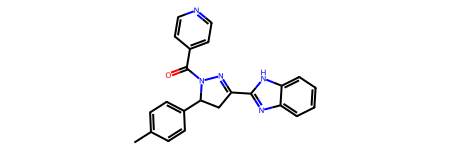

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Создаем молекулу из SMILES-строки
group = Chem.MolFromSmiles('C1CC(=NN1)C1=NC2=C(N1)C=CC=C2')

mol = Chem.MolFromSmiles('O=C(C=1C=CN=CC1)N2N=C(C3=NC=4C=CC=CC4N3)CC2C5=CC=C(C=C5)C')

# group
mol

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv')

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors

def calculate_admet_score(mol):
    if mol is None:
        return None

    num_h_donors = Lipinski.NumHDonors(mol)
    num_h_acceptors = Lipinski.NumHAcceptors(mol)
    mol_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)

    tpsa = Descriptors.TPSA(mol)

    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)

    score_h_donors = max(0, min(1, (5 - num_h_donors) / 5))  # Ideal is <= 5
    score_h_acceptors = max(0, min(1, (10 - num_h_acceptors) / 10))  # Ideal is <= 10
    score_mol_weight = max(0, min(1, (500 - mol_weight) / 500))  # Ideal is <= 500
    score_logp = max(0, min(1, (5 - logp) / 5))  # Ideal is <= 5
    score_tpsa = max(0, min(1, (140 - tpsa) / 140))  # Ideal is <= 140
    score_rotatable_bonds = max(0, min(1, (10 - num_rotatable_bonds) / 10))  # Ideal is <= 10

    # Calculate the average ADMET score
    admet_score = (score_h_donors +
                   score_h_acceptors +
                   score_mol_weight +
                   score_logp +
                   score_tpsa +
                   score_rotatable_bonds) / 6

    return admet_score


# df.drop(columns=['ADMET Score'], inplace=True)

def process_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return calculate_admet_score(mol)

df['ADMET Score'] = df['Smiles'].apply(process_smiles)
df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv', index=False)

In [ ]:
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,PAINSProperty,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,SAScore,Predicted MIC (log),Predicted MIC,ADMET Score
0,O=[SH]c1ccc2c(c1)C1C=CCC1C(c1cc(C(O)F)c3cccnc3...,-0.585900000000005,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,9.1,7.5,...,1,0,1,-9.1,-7.5,0,9.220544,-1.056913,0.087718,0.340109
1,CN(C)c1cc(-c2cccc(Cl)c2)c2ncc(NCC=O)c(C3CCCC3O...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,7.5,9.9,...,0,1,0,-7.5,-9.9,0,9.094757,-1.365258,0.043126,0.368743
2,C=CCOc1cc2nccc(COC)c2c(OC(C)C=O)c1-c1ccccn1,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.0,6.2,...,0,1,0,-6.0,-6.2,0,8.987137,-1.702320,0.019846,0.407408
3,CNC(C)(C)c1c(C#N)ccc2nccc(C3CCCNC3)c12,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,9.1,...,0,0,0,-6.0,-9.1,0,8.930350,-1.565128,0.027219,0.540615
4,N#Cc1cc(C2CC2)cc2nc(C3CCCC3)c(-c3cccc(Cl)c3)cc12,-1.9618800000000052,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.9,8.9,...,0,0,0,-7.9,-8.9,0,8.804938,-0.856374,0.139196,0.582034


In [ ]:
df['ADMET Score'].mean()

0.3918533658095238

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinolone.csv')
print(df['SAScore'].mean()) #Среднее значение SAScore в исходном датасете 9.000
print(df['QED Score'].mean()) #Среднее значение QED Score в исходном датасете 0.2192
print(df['ADMET Score'].mean()) #Среднее значение ADMET в исходном датасете 0,577

8.979973451084101
0.40398513994753166
0.28710883201387644


In [ ]:
ecoli_df =  pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar.csv')

ecoli_df.drop(columns=['ADMET Score'], inplace=True)

def process_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return calculate_admet_score(mol)

ecoli_df['ADMET Score'] = ecoli_df['smiles'].apply(process_smiles)
ecoli_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar.csv', index=False)

ecoli_df['ADMET Score'].mean()

0.384754967382657

RA Score added

In [ ]:
%pip install git+https://github.com/reymond-group/RAscore.git

  Cloning https://github.com/reymond-group/RAscore.git to /tmp/pip-req-build-pt0bejc9
  Running command git clone --filter=blob:none --quiet https://github.com/reymond-group/RAscore.git /tmp/pip-req-build-pt0bejc9
  Resolved https://github.com/reymond-group/RAscore.git to commit cb77db503ee5cbf0e8bb8963df6e5b76b3a94f06
  Preparing metadata (setup.py) ... done
  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached xgboost-1.0.2-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
INFO: pip is looking at multiple versions of rascore to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.5.0 (from rascore) (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.

In [ ]:
!git clone https://github.com/reymond-group/RAscore.git

fatal: destination path 'RAscore' already exists and is not an empty directory.


In [ ]:
import sys
import os

In [ ]:
!pip install xgboost==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [ ]:
!pip install --upgrade xgboost

In [ ]:
import pandas as pd

file1 = '/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinolone.csv'
file2 = '/content/drive/MyDrive/Project/Оценка молекул/train_000_double_dock_quinoline.csv'
file3 = '/content/drive/MyDrive/Project/Оценка молекул/train_000_double_docking_benz_qed.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

combined_df = pd.concat([df1, df2, df3], ignore_index=True)


combined_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final.csv', index=False)
combined_df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,DockingScore1Property,DockingScore2Property,Epoch,Lipinski Rule of Five,Lipinski Rule of Three,QED Score,SAScore,Predicted MIC (log),Predicted MIC,ADMET Score
0,O=[SH]c1ccc2c(c1)C1C=CCC1C(OC(F)c1cc3c(cc1F)c(...,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,9.5,9.5,...,-9.5,-9.5,0,False,False,0.238471,9.266640,-2.345571,0.004513,0.224084
1,CN(C)C1CC(O)C(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3NCC...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,8.4,8.3,...,-8.4,-8.3,0,False,False,0.426426,9.199422,-1.687784,0.020522,0.263918
2,C=CCOc1cc2c(cc1F)c(=O)c(C(=O)O)cn2-c1cc(OC(C)C...,-0.0,-0.0,-0.0,-0.0,-1.0,-1.0,-0.0,7.4,7.1,...,-7.4,-7.1,0,True,False,0.463090,9.043112,-1.640451,0.022885,0.282945
3,CNC(C)(C)c1cc2c(cc1F)c(=O)c(C(=O)O)cn2C1CCCN(C...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,7.3,9.9,...,-7.3,-9.9,0,True,False,0.783334,8.987137,-2.674349,0.002117,0.440386
4,Cn1ncc2c1CC(c1cccc(Cl)c1)CC2n1cc(C(=O)O)c(=O)c...,-0.9523800000000051,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,8.8,7.9,...,-8.8,-7.9,0,False,False,0.341831,9.275772,-2.699257,0.001999,0.346536


In [ ]:
import pandas as pd

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final.csv')

filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df['ADMET Score'] = pd.to_numeric(filtered_df['ADMET Score'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')

filtered_df = filtered_df[(filtered_df['QED Score'] > 0.4) &
                          (filtered_df['DockingScore1Property'] < -11) &
                          (filtered_df['DockingScore2Property'] < -10) &
                          (filtered_df['Predicted MIC'] < 0.02) &
                          (filtered_df['SAScore'] < 9) &
                          (filtered_df['Epoch'] > 150) &
                          (filtered_df['Lipinski Rule of Five'] == True) &
                          (filtered_df['ADMET Score'] > 0.3)]

len(filtered_df)
# filtered_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final_top22.csv', index=False)

23

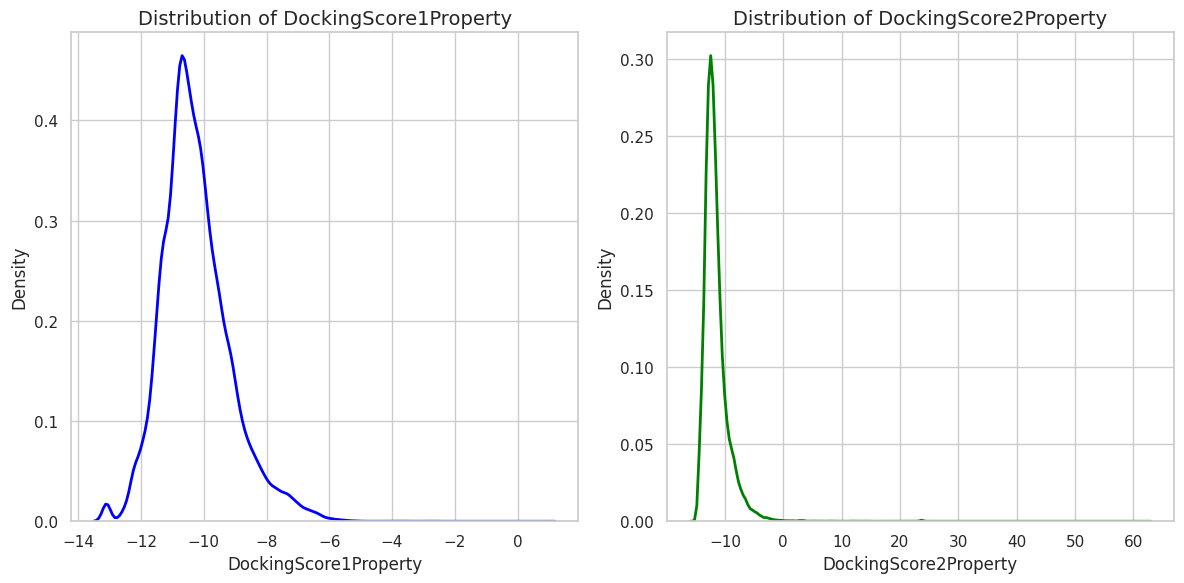

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final.csv')

combined_df['DockingScore1Property'] = pd.to_numeric(combined_df['DockingScore1Property'], errors='coerce')
combined_df['DockingScore2Property'] = pd.to_numeric(combined_df['DockingScore2Property'], errors='coerce')

combined_df = combined_df.dropna(subset=['DockingScore1Property', 'DockingScore2Property'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(combined_df['DockingScore1Property'], color='blue', linewidth=2)
plt.title('Distribution of DockingScore1Property', fontsize=14)
plt.xlabel('DockingScore1Property')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(combined_df['DockingScore2Property'], color='green', linewidth=2)
plt.title('Distribution of DockingScore2Property', fontsize=14)
plt.xlabel('DockingScore2Property')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final.csv')

filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df['ADMET Score'] = pd.to_numeric(filtered_df['ADMET Score'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')

filtered_df = filtered_df[(filtered_df['Epoch'] > 150)]

filtered_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/filtered_final_all.csv', index=False)

Adding the toxicity

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/de_novo_with_rascore - de_novo_with_rascore.csv')
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,DockingScore2Property,Epoch,Lipinski Rule of Five,Lipinski Rule of Three,QED Score,SAScore,Predicted MIC (log),Predicted MIC,ADMET Score,RAScore
0,O=C(O)c1c[nH]c2cc(C3CCCC(C(=O)Oc4nnc(-c5ccno5)...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.6,11.3,...,-11.3,151.0,TRUE,FALSE,0.415741,9.135724,-1.942892,0.011405,0.267774,0.617492
1,O=C(O)c1c[nH]c2cc(C3CCCC(c4nnc(-c5cc(-c6nnco6)...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,12.0,11.8,...,-11.8,151.0,FALSE,FALSE,0.363978,9.155996,-1.638230,0.023002,0.222699,0.168979
2,O=C(Nc1nnco1)c1nnc(C2CCCC(c3cc4[nH]cc(C(=O)O)c...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.3,6.5,...,-6.5,151.0,TRUE,FALSE,0.394406,9.135724,-2.118188,0.007617,0.249696,0.891754
3,O=C(O)c1c[nH]c2cc(C3CCCC(c4cc(-c5nnc(-c6nnco6)...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.7,13.3,...,-13.3,151.0,FALSE,FALSE,0.315834,9.196050,-1.993122,0.010160,0.195483,0.701612
4,O=C(O)c1c[nH]c2cc(C3CCCC(c4nnc(-c5cc(-c6nnco6)...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.4,12.5,...,-12.5,151.0,FALSE,FALSE,0.315834,9.196050,-1.697012,0.020090,0.195483,0.452600


Toxicity with the Brenk filter

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

def check_brenk_toxicity(df, smiles_column='Smiles'):
    params_brenk = FilterCatalogParams()
    params_brenk.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
    catalog_brenk = FilterCatalog(params_brenk)

    def is_non_toxic(smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                return False
            if catalog_brenk.HasMatch(mol):
                return False
            return True
        except:
            return False

    df['Brenk Score'] = df[smiles_column].apply(is_non_toxic)

    return df

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/de_novo_with_rascore - de_novo_with_rascore.csv')  # Загрузка вашего датасета
df_with_brenk_toxicity = check_brenk_toxicity(df, smiles_column='Smiles')

df_with_brenk_toxicity.head()
df_with_brenk_toxicity.to_csv('/content/drive/MyDrive/Project/Оценка молекул/de_novo_with_rascore_brenk.csv', index=False)

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

def check_brenk_toxicity(smiles_list):
    params_brenk = FilterCatalogParams()
    params_brenk.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
    catalog_brenk = FilterCatalog(params_brenk)

    def is_non_toxic(smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                return False
            if catalog_brenk.HasMatch(mol):
                return False
            return True
        except:
            return False

    results = [(smiles, is_non_toxic(smiles)) for smiles in smiles_list]

    return pd.DataFrame(results, columns=['Smiles', 'Brenk Score'])

smiles_list = [
    'C1CC1N2C=C(C(=O)O)C3=CC(=C(F)C=C3C2=O)N4CCNCC4',  # Ciprofloxacin
    'C1CC1N2C=C(C(=O)O)C3=CC(=CC=C3C2=O)N4CCNCC4',       # Norfloxacin
    'CC1CC(OCC2=C(C(=O)O1)C(=CN=C2C3CCNCC3)C4=CC=CC=C4F)C5=CC=CC=C5'  # Moxifloxacin
]

df_with_brenk_toxicity = check_brenk_toxicity(smiles_list)

df_with_brenk_toxicity


,Smiles,Brenk Score
0,C1CC1N2C=C(C(=O)O)C3=CC(=C(F)C=C3C2=O)N4CCNCC4,True
1,C1CC1N2C=C(C(=O)O)C3=CC(=CC=C3C2=O)N4CCNCC4,True
2,CC1CC(OCC2=C(C(=O)O1)C(=CN=C2C3CCNCC3)C4=CC=CC...,True


Фильтрация

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/de_novo_with_rascore_brenk.csv')
print(df['QED Score'].mean()) #Среднее значение SAScore в исходном датасете 9.000
print(df['DockingScore1Property'].mean()) #Среднее значение QED Score в исходном датасете 0.2192
# print(df['DockingScore2Property'].mean()) #Среднее значение ADMET в исходном датасете 0,577
print(df['Predicted MIC'].mean()) #Среднее значение SAScore в исходном датасете 9.000
print(df['SAScore'].mean()) #Среднее значение QED Score в исходном датасете 0.2192
print(df['ADMET Score'].mean()) #Среднее значение ADMET в исходном датасете 0,577

0.3779786253052045
-10.58557078704798
0.06880115349702745
8.952901053097065
0.26595632351799003


In [ ]:
import pandas as pd

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/de_novo_with_rascore_brenk.csv')

filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df['ADMET Score'] = pd.to_numeric(filtered_df['ADMET Score'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')

filtered_df = filtered_df[(filtered_df['QED Score'] > 0.3) &
                          (filtered_df['DockingScore1Property'] < -10) &
                          (filtered_df['DockingScore2Property'] < -10) &
                          (filtered_df['Predicted MIC'] < 0.05) &
                          (filtered_df['SAScore'] < 9) &
                          # (filtered_df['Epoch'] > 150) &
                          (filtered_df['Lipinski Rule of Five'] == 'True') &
                          (filtered_df['Brenk Score'] == True)]

len(filtered_df)


2475

С линкерами

In [ ]:
import pandas as pd

# Пути к трем CSV файлам
file1 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_1.csv'
file2 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_2.csv'
file3 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_4.csv'
file4 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_q1.csv'
file5 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_q2.csv'
file6 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_q3.csv'
file7 = '/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linker_q4.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)

combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

combined_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linkers.csv', index=False)
combined_df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,LogPProperty,HeavyAtomCountProperty,NumHAcceptorsProperty,NumHDonorsProperty,PAINSProperty,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch
0,C#Cc1[nH]c2cc(N3CCN(C4CCC(c5nc6ccc(-c7c[nH]c8c...,-0.9956000000000058,-12.0,-0.0,-0.0,-0.0,-1.0,-1.0,8.5,2.6,...,5.995600000000006,52,8,4,0,1,1,-8.5,-2.6,0
1,C#Cc1cc(C2CCCC2O)c2nc(C3CCC(N4CCN(c5c(F)c(N(C)...,-0.0,-9.0,-0.0,-0.0,-0.0,-1.0,-0.0,4.9,4.6,...,4.637480000000003,49,8,4,0,1,0,-4.9,-4.6,0
2,C#Cn1c(C2CCC(N3CCN(c4cc5[nH]cc(C(=O)O)c(=O)c5c...,-0.9569000000000054,-16.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.1,8.6,...,5.956900000000005,56,10,2,0,1,0,-6.1,-8.6,0
3,C#Cc1cc(C)c2[nH]c(C3CCC(N4CCN(c5c(F)cc6c(=O)c(...,-0.0,-7.0,-0.0,-0.0,-0.0,-1.0,-0.0,8.3,0.6,...,4.828120000000004,47,6,4,0,1,0,-8.3,-0.6,0
4,N#Cn1c(C2CCC(N3CCN(c4cc5[nH]cc(C(=O)O)c(=O)c5c...,-4.558279999999998,-18.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,9.558279999999998,58,7,2,0,0,0,0.8,7.8,0


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

def check_brenk_toxicity(df, smiles_column='Smiles'):
    params_brenk = FilterCatalogParams()
    params_brenk.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
    catalog_brenk = FilterCatalog(params_brenk)

    def is_non_toxic(smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                return False
            if catalog_brenk.HasMatch(mol):
                return False
            return True
        except:
            return False

    df['Brenk Score'] = df[smiles_column].apply(is_non_toxic)

    return df

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv')  # Загрузка вашего датасета
df_with_brenk_toxicity = check_brenk_toxicity(df, smiles_column='Smiles')

df_with_brenk_toxicity.head()
df_with_brenk_toxicity.to_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv', index=False)

In [ ]:
df_with_brenk_toxicity.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,file name,SAScore,QED Score,Lipinski Ro5 Pass,Lipinski Ro3 Pass,Brenk Score
0,NC(=O)Nc1nnc(-c2nc3cc(-c4ccon4)cc(-c4ccc5cc[nH...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.8,14.1,...,0,-10.8,-14.1,200,sample_200_benzimidazole_AB.csv,3.252077,0.331646,True,False,True
1,c1cc2ccc(-c3nnc(-c4cc5nc[nH]c5cc4-c4nnc(-c5nnc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.6,12.9,...,0,-11.6,-12.9,200,sample_200_benzimidazole_AB.csv,3.293507,0.413343,False,False,True
2,NC(=O)Nc1nnc(-c2nc3cc(-c4ccc5c(c4)OCO5)c(-c4cc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,9.1,13.2,...,0,-9.1,-13.2,200,sample_200_benzimidazole_AB.csv,2.968932,0.320161,True,False,True
3,c1ccc2c(-c3nnc(-c4nc5c(C6CCCNC6)ccc(-c6nnco6)c...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.6,13.1,...,0,-10.6,-13.1,200,sample_200_benzimidazole_AB.csv,3.694614,0.360777,True,False,True
4,O=C1CCC(c2nnc(-c3cc4nc[nH]c4cc3-c3nnc(-c4cccc5...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.3,12.4,...,0,-11.3,-12.4,200,sample_200_benzimidazole_AB.csv,3.630044,0.396813,True,False,True


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv')

import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


def check_qed(mol):
    """Calculates QED-score."""
    return Descriptors.qed(mol)

def check_lipinski_ro5(mol):
    """Checks Lipinski's rule of five for drug-like molecules."""
    return Lipinski.NumHDonors(mol) < 5 and \
           Lipinski.NumHAcceptors(mol) < 10 and \
           Descriptors.MolWt(mol) < 500 and \
           Descriptors.MolLogP(mol) < 5

def check_lipinski_ro3(mol):
    """Checks Lipinski's rule of three for lead-like molecules."""
    return Lipinski.NumHDonors(mol) < 3 and \
           Lipinski.NumHAcceptors(mol) < 3 and \
           Descriptors.MolWt(mol) < 300 and \
           Descriptors.MolLogP(mol) < 3

def process_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed_score = check_qed(mol)
        lipinski_ro5_pass = check_lipinski_ro5(mol)
        lipinski_ro3_pass = check_lipinski_ro3(mol)
        return qed_score, lipinski_ro5_pass, lipinski_ro3_pass
    else:
        return None, None, None

df['QED Score'] = None
df['Lipinski Ro5 Pass'] = None
df['Lipinski Ro3 Pass'] = None

for index, row in df.iterrows():
    smiles = row['Smiles']
    qed_score, lipinski_ro5_pass, lipinski_ro3_pass = process_molecule(smiles)

    df.at[index, 'QED Score'] = qed_score
    df.at[index, 'Lipinski Ro5 Pass'] = lipinski_ro5_pass
    df.at[index, 'Lipinski Ro3 Pass'] = lipinski_ro3_pass

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv', index=False)

df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,file name,SAScore,QED Score,Lipinski Ro5 Pass,Lipinski Ro3 Pass
0,NC(=O)Nc1nnc(-c2nc3cc(-c4ccon4)cc(-c4ccc5cc[nH...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.8,14.1,...,0,0,-10.8,-14.1,200,sample_200_benzimidazole_AB.csv,3.252077,0.331646,True,False
1,c1cc2ccc(-c3nnc(-c4cc5nc[nH]c5cc4-c4nnc(-c5nnc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.6,12.9,...,0,0,-11.6,-12.9,200,sample_200_benzimidazole_AB.csv,3.293507,0.413343,False,False
2,NC(=O)Nc1nnc(-c2nc3cc(-c4ccc5c(c4)OCO5)c(-c4cc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,9.1,13.2,...,0,0,-9.1,-13.2,200,sample_200_benzimidazole_AB.csv,2.968932,0.320161,True,False
3,c1ccc2c(-c3nnc(-c4nc5c(C6CCCNC6)ccc(-c6nnco6)c...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.6,13.1,...,0,0,-10.6,-13.1,200,sample_200_benzimidazole_AB.csv,3.694614,0.360777,True,False
4,O=C1CCC(c2nnc(-c3cc4nc[nH]c4cc3-c3nnc(-c4cccc5...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.3,12.4,...,0,0,-11.3,-12.4,200,sample_200_benzimidazole_AB.csv,3.630044,0.396813,True,False


In [ ]:
!pip install -U scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

with open("/content/drive/MyDrive/Project/Оценка молекул/Linkers/benz_model_gb.pkl", "rb") as f:
  model = pickle.load(f)

def get_fingerprint(mol):
    fp_array = np.zeros((256,), dtype=np.int8)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=256)
    ConvertToNumpyArray(fp, fp_array)
    return fp_array

def predict_mic(smiles, model):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = get_fingerprint(mol)
    mic = model.predict([fp])
    return mic[0]

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_null_gyrases.csv") # или если датасет уже загружен в df

df = df.drop(columns=['Predicted MIC (log)'])
df = df.drop(columns=['Predicted MIC'])

df['Predicted MIC (log)'] = df['Smiles'].apply(lambda x: predict_mic(x, model))
df['Predicted MIC'] = 10**df['Predicted MIC (log)']

df.to_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_null_gyrases.csv", index=False)

df.head()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linkers.csv")
filtered_df = df.drop_duplicates(subset="Smiles")
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df = filtered_df[
                          (filtered_df['Epoch'] > 150)]
len(filtered_df)

<ipython-input-8-d8931cfb8211>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')


3995

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import sascorer
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv')

def check_sascore(smiles):
    """Calculates SAScore for a SMILES string"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return sascorer.calculateScore(mol)

df['SAScore'] = df['Smiles'].apply(check_sascore)

df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/combined_sample_200_benzimidazole_gyrases.csv')

df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,NumHAcceptorsProperty,NumHDonorsProperty,PAINSProperty,SureChEMBLProperty,GlaxoProperty,DockingScore1Property,DockingScore2Property,Epoch,file name,SAScore
0,NC(=O)Nc1nnc(-c2nc3cc(-c4ccon4)cc(-c4ccc5cc[nH...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.8,14.1,...,7,4,0,0,0,-10.8,-14.1,200,sample_200_benzimidazole_AB.csv,3.252077
1,c1cc2ccc(-c3nnc(-c4cc5nc[nH]c5cc4-c4nnc(-c5nnc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.6,12.9,...,10,2,0,0,0,-11.6,-12.9,200,sample_200_benzimidazole_AB.csv,3.293507
2,NC(=O)Nc1nnc(-c2nc3cc(-c4ccc5c(c4)OCO5)c(-c4cc...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,9.1,13.2,...,8,3,0,0,0,-9.1,-13.2,200,sample_200_benzimidazole_AB.csv,2.968932
3,c1ccc2c(-c3nnc(-c4nc5c(C6CCCNC6)ccc(-c6nnco6)c...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,10.6,13.1,...,8,3,0,0,0,-10.6,-13.1,200,sample_200_benzimidazole_AB.csv,3.694614
4,O=C1CCC(c2nnc(-c3cc4nc[nH]c4cc3-c3nnc(-c4cccc5...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,11.3,12.4,...,9,2,0,0,0,-11.3,-12.4,200,sample_200_benzimidazole_AB.csv,3.630044


In [ ]:
df.head()

,Smiles,LogPReward,HeavyAtomCountReward,NumHAcceptorsReward,NumHDonorsReward,PAINSReward,SureChEMBLReward,GlaxoReward,DockingScore1Reward,DockingScore2Reward,...,DockingScore1Property,DockingScore2Property,Epoch,Brenk Score,QED Score,Lipinski Ro5 Pass,Lipinski Ro3 Pass,Predicted MIC (log),Predicted MIC,SAScore
0,C#Cc1[nH]c2cc(N3CCN(C4CCC(c5nc6ccc(-c7c[nH]c8c...,-0.9956000000000058,-12.0,-0.0,-0.0,-0.0,-1.0,-1.0,8.5,2.6,...,-8.5,-2.6,0,False,0.111036,False,False,-2.464863,0.003429,9.243805
1,C#Cc1cc(C2CCCC2O)c2nc(C3CCC(N4CCN(c5c(F)c(N(C)...,-0.0,-9.0,-0.0,-0.0,-0.0,-1.0,-0.0,4.9,4.6,...,-4.9,-4.6,0,False,0.216002,False,False,-2.123960,0.007517,9.283477
2,C#Cn1c(C2CCC(N3CCN(c4cc5[nH]cc(C(=O)O)c(=O)c5c...,-0.9569000000000054,-16.0,-0.0,-0.0,-0.0,-1.0,-0.0,6.1,8.6,...,-6.1,-8.6,0,False,0.129500,False,False,-2.783960,0.001645,9.392628
3,C#Cc1cc(C)c2[nH]c(C3CCC(N4CCN(c5c(F)cc6c(=O)c(...,-0.0,-7.0,-0.0,-0.0,-0.0,-1.0,-0.0,8.3,0.6,...,-8.3,-0.6,0,False,0.232590,False,False,-2.103611,0.007878,9.193046
4,N#Cn1c(C2CCC(N3CCN(c4cc5[nH]cc(C(=O)O)c(=O)c5c...,-4.558279999999998,-18.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.8,7.8,0,True,0.168462,False,False,-2.453437,0.003520,9.182485


Filter

In [ ]:
import pandas as pd

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv')

filtered_df['QED'] = pd.to_numeric(filtered_df['QED'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')
filtered_df['PAINSProperty'] = pd.to_numeric(filtered_df['PAINSProperty'], errors='coerce')
filtered_df['SureChEMBLProperty'] = pd.to_numeric(filtered_df['SureChEMBLProperty'], errors='coerce')
filtered_df['GlaxoProperty'] = pd.to_numeric(filtered_df['GlaxoProperty'], errors='coerce')

filtered_df = filtered_df[(filtered_df['QED'] > 0.3) &
                          (filtered_df['DockingScore1Property'] <= -11) &
                          (filtered_df['DockingScore2Property'] <= -11) &
                          (filtered_df['Predicted MIC'] < 0.01) &
                          (filtered_df['SAScore'] < 4) &
                          (filtered_df['BRENK'] == False) &
                          (filtered_df['PAINSProperty'] == 0) &
                          (filtered_df['SureChEMBLProperty'] == 0) &
                          (filtered_df['GlaxoProperty'] == 0)]

# unique_smiles_count = filtered_df['Smiles'].nunique()
# print(unique_smiles_count)

#filtered_df.head()
len(filtered_df)
# filtered_df.to_csv('/content/drive/MyDrive/Project/Оценка молекул/fragment_final_mols.csv', index=False)

64

In [ ]:
import pandas as pd

def filter_molecules(file_path, output_path):
    df = pd.read_csv(file_path)

    df['QED'] = pd.to_numeric(df['QED'], errors='coerce')
    df['SAScore'] = pd.to_numeric(df['SAScore'], errors='coerce')
    df['DockingScore1Property'] = pd.to_numeric(df['DockingScore1Property'], errors='coerce')
    df['DockingScore2Property'] = pd.to_numeric(df['DockingScore2Property'], errors='coerce')
    df['PAINSProperty'] = pd.to_numeric(df['PAINSProperty'], errors='coerce')
    df['SureChEMBLProperty'] = pd.to_numeric(df['SureChEMBLProperty'], errors='coerce')
    df['GlaxoProperty'] = pd.to_numeric(df['GlaxoProperty'], errors='coerce')

    if 'Predicted MIC' in df.columns:
        df['Predicted MIC'] = pd.to_numeric(df['Predicted MIC'], errors='coerce')
    elif 'MIC' in df.columns:
        df['Predicted MIC'] = pd.to_numeric(df['MIC'], errors='coerce')
    else:
        print(f"Ошибка: В файле {file_path} отсутствует колонка 'Predicted MIC' или 'MIC'.")
        return 0

    # Применение фильтрации
    filtered_df = df[
      (df['DockingScore1Property'] <= -11) &
                    #  (df['QED'] > 0.3) &
                     (df['DockingScore2Property'] <= -11)
                    #  (df['Predicted MIC'] < 0.01) &
                    #  (df['SAScore'] < 4) &
                    #  (df['BRENK'] == False) &
                    #  (df['PAINSProperty'] == 0) &
                    #  (df['SureChEMBLProperty'] == 0) &
                    #  (df['GlaxoProperty'] == 0)
                    ]

    filtered_df.to_csv(output_path, index=False)
    return len(filtered_df)

de_novo_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv"
linkers_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv"
fragments_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv"

de_novo_output = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_final_mols.csv"
linkers_output = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_final_mols.csv"
fragments_output = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_final_mols.csv"

total_count = 0
total_count += filter_molecules(de_novo_file, de_novo_output)
total_count += filter_molecules(linkers_file, linkers_output)
total_count += filter_molecules(fragments_file, fragments_output)

print(f"Total filtered molecules from all files: {total_count}")


Total filtered molecules from all files: 5087


In [ ]:
import pandas as pd

file_paths = ["/content/drive/MyDrive/Project/Оценка молекул/fragment_final_mols.csv",
              "/content/drive/MyDrive/Project/Оценка молекул/de_novo_final_mols.csv",
              "/content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv"]

data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)

    if "Predicted MIC" in df.columns:
        df = df.rename(columns={"Predicted MIC": "MIC"})

    df = df[["Smiles", "QED", "MIC", "SAScore", 'DockingScore1Property', 'DockingScore2Property']]
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

len(combined_df)

<ipython-input-33-10a8a0d90aa1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
<ipython-input-33-10a8a0d90aa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
<ipython-input-33-10a8a0d90aa1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

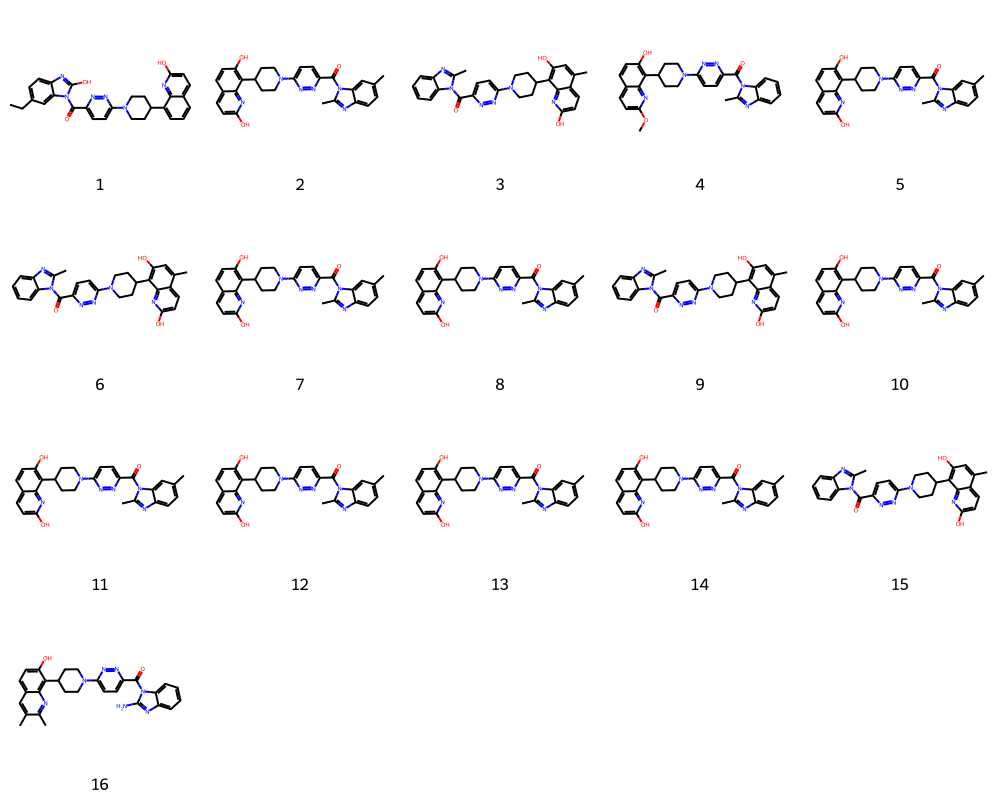

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

filtered_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/Linkers/train_000_linkers')
filtered_df = filtered_df.drop_duplicates()

filtered_df['QED Score'] = pd.to_numeric(filtered_df['QED Score'], errors='coerce')
filtered_df['Predicted MIC'] = pd.to_numeric(filtered_df['Predicted MIC'], errors='coerce')
filtered_df['SAScore'] = pd.to_numeric(filtered_df['SAScore'], errors='coerce')
filtered_df['Epoch'] = pd.to_numeric(filtered_df['Epoch'], errors='coerce')
filtered_df['DockingScore1Property'] = pd.to_numeric(filtered_df['DockingScore1Property'], errors='coerce')
filtered_df['DockingScore2Property'] = pd.to_numeric(filtered_df['DockingScore2Property'], errors='coerce')

df = filtered_df[(filtered_df['QED Score'] > 0.3) &
                          (filtered_df['DockingScore1Property'] < -10) &
                          (filtered_df['DockingScore2Property'] < -11) &
                          (filtered_df['Predicted MIC'] < 0.04) &
                          (filtered_df['SAScore'] < 9) &
                          (filtered_df['Epoch'] > 150) &
                          (filtered_df['Lipinski Ro5 Pass'] == True) &
                          (filtered_df['Brenk Score'] == True)]
smiles_list = df['Smiles'].dropna().tolist()

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if Chem.MolFromSmiles(smiles) is not None]

legends = [f"{i + 1}" for i in range(len(mols))]

img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=legends)

display(img)

In [ ]:
import sys, os
from rdkit.Chem import RDConfig
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

def check_sascore(mol):
  """ Calculates SAScore """
  return sascorer.calculateScore(mol)


Distribution for docking scores

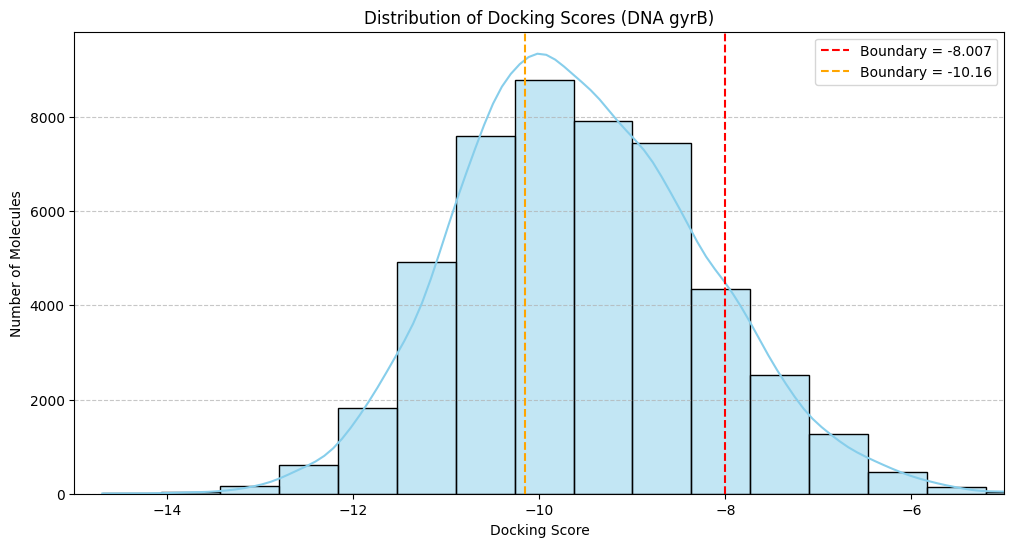

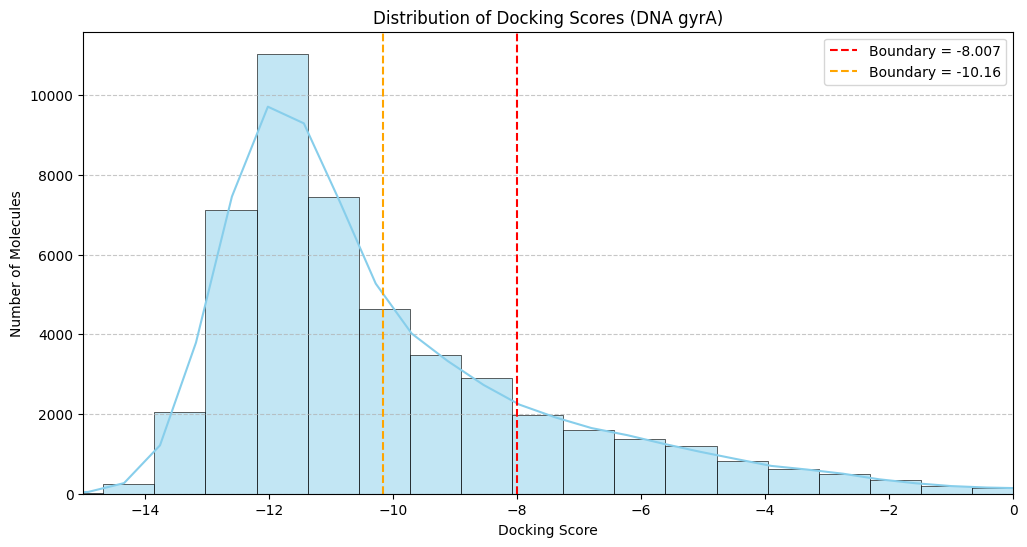

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/all_mols.csv")  # Укажите свой путь к файлу

boundary1 = -8.007
boundary2 = -10.160

def plot_distribution(data, column, title, xlim=None, bins=40):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True, bins=bins, color='skyblue')
    plt.axvline(boundary1, color='red', linestyle='--', label=f'Boundary = {boundary1}')
    plt.axvline(boundary2, color='orange', linestyle='--', label=f'Boundary = {boundary2}')
    plt.title(title)
    plt.xlabel('Docking Score')
    plt.ylabel('Number of Molecules')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if xlim:
        plt.xlim(xlim)
    plt.show()

plot_distribution(df, 'DockingScore1Property', title="Distribution of Docking Scores (DNA gyrB)", xlim=(-15, -5), bins=30)
plot_distribution(df, 'DockingScore2Property', title="Distribution of Docking Scores (DNA gyrA)", xlim=(-15, 0), bins=140)


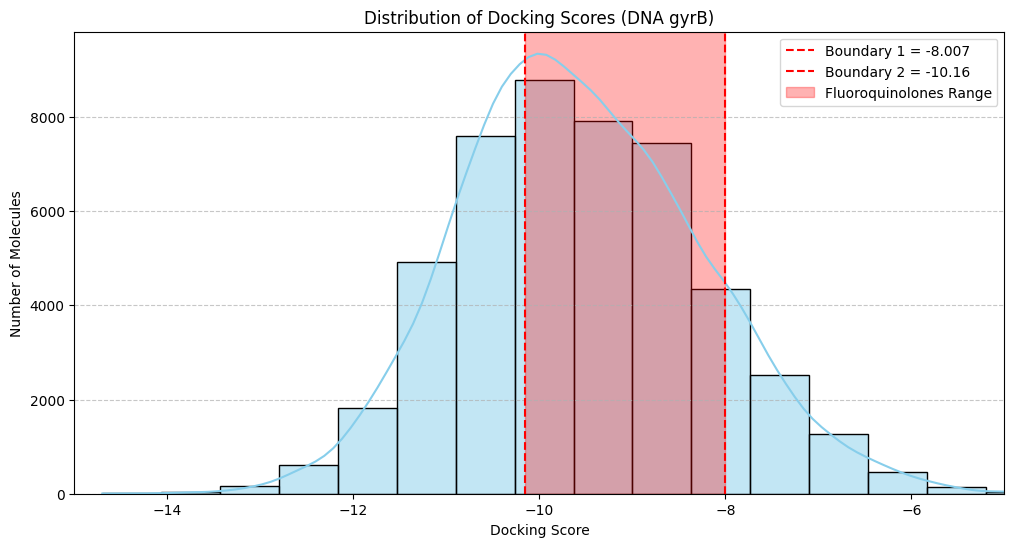

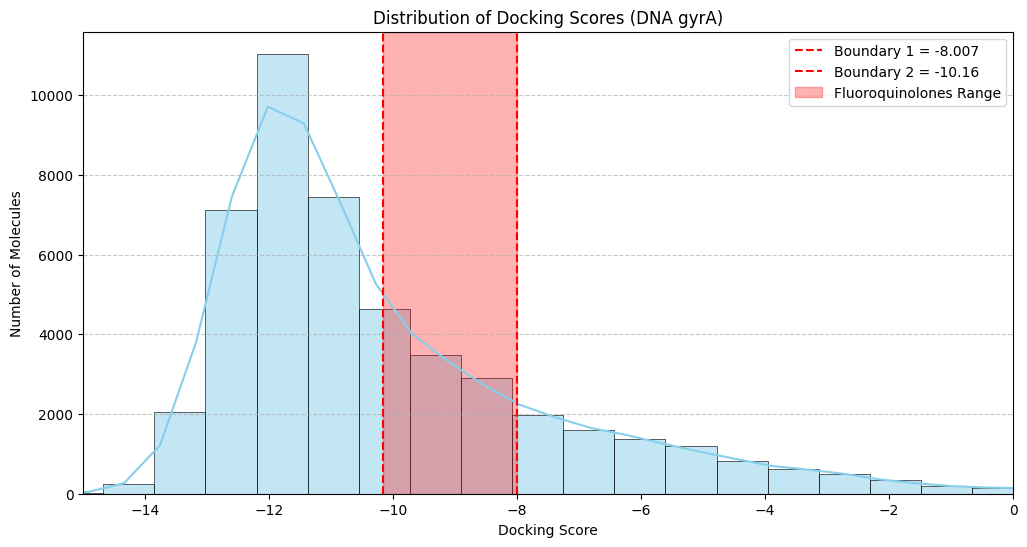

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/all_mols.csv")  # Укажите свой путь к файлу

boundary1 = -8.007
boundary2 = -10.160

def plot_distribution(data, column, title, xlim=None, bins=40):
    plt.figure(figsize=(12, 6))

    sns.histplot(data[column], kde=True, bins=bins, color='skyblue')

    plt.axvline(boundary1, color='red', linestyle='--', label=f'Boundary 1 = {boundary1}')
    plt.axvline(boundary2, color='red', linestyle='--', label=f'Boundary 2 = {boundary2}')

    plt.axvspan(boundary2, boundary1, color='red', alpha=0.3, label='Fluoroquinolones Range')

    plt.title(title)
    plt.xlabel('Docking Score')
    plt.ylabel('Number of Molecules')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if xlim:
        plt.xlim(xlim)

    plt.show()

plot_distribution(df, 'DockingScore1Property', title="Distribution of Docking Scores (DNA gyrB)", xlim=(-15, -5), bins=30)
plot_distribution(df, 'DockingScore2Property', title="Distribution of Docking Scores (DNA gyrA)", xlim=(-15, 0), bins=140)


       DockingScore1Property  DockingScore2Property
count              56.000000              56.000000
mean              -10.712500             -11.919643
std                 0.472157               0.984686
min               -11.900000             -13.800000
25%               -10.925000             -12.700000
50%               -10.600000             -12.000000
75%               -10.400000             -11.175000
max               -10.000000             -10.000000
DockingScore1Property    0
DockingScore2Property    0
dtype: int64
DockingScore1Property - Min: -11.9, Max: -10.0


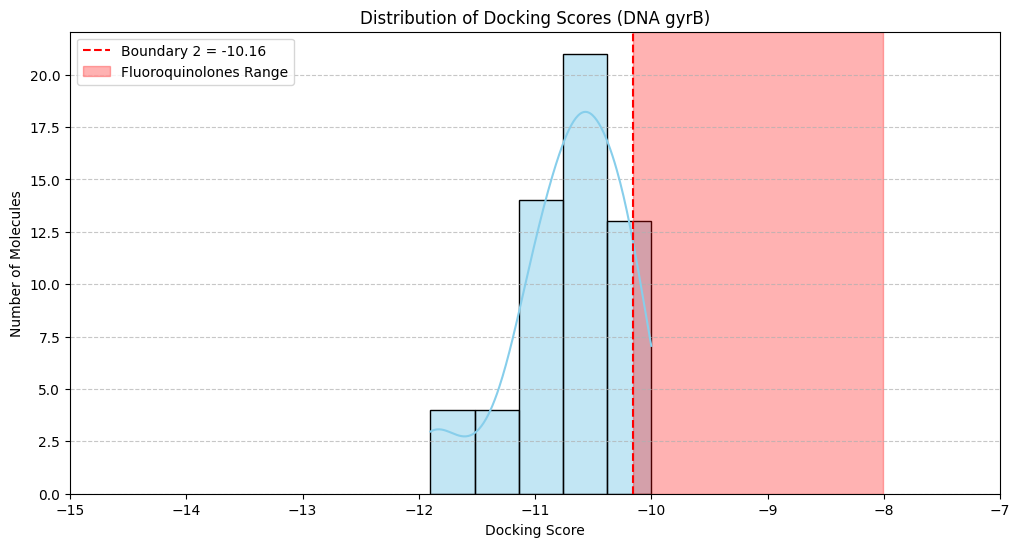

DockingScore2Property - Min: -13.8, Max: -10.0


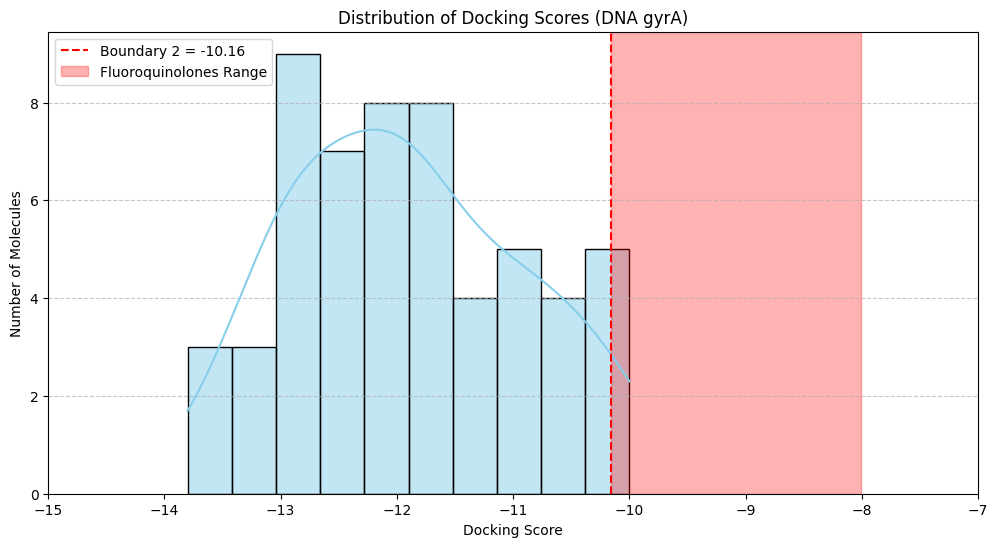

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

print(df[['DockingScore1Property', 'DockingScore2Property']].describe())
print(df[['DockingScore1Property', 'DockingScore2Property']].isnull().sum())

df = df.dropna(subset=['DockingScore1Property', 'DockingScore2Property'])

def plot_distribution(data, column, title, xlim=None, bins=40):
    plt.figure(figsize=(12, 6))

    sns.histplot(data[column], kde=True, bins=bins, color='skyblue')

    min_val, max_val = data[column].min(), data[column].max()
    print(f"{column} - Min: {min_val}, Max: {max_val}")

    if boundary1 >= min_val and boundary1 <= max_val:
        plt.axvline(boundary1, color='red', linestyle='--', label=f'Boundary 1 = {boundary1}')
    if boundary2 >= min_val and boundary2 <= max_val:
        plt.axvline(boundary2, color='red', linestyle='--', label=f'Boundary 2 = {boundary2}')
    if boundary1 >= min_val and boundary2 <= max_val:
        plt.axvspan(boundary2, boundary1, color='red', alpha=0.3, label='Fluoroquinolones Range')

    plt.title(title)
    plt.xlabel('Docking Score')
    plt.ylabel('Number of Molecules')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if xlim:
        plt.xlim(xlim)

    plt.show()

plot_distribution(df, 'DockingScore1Property', title="Distribution of Docking Scores (DNA gyrB)", xlim=(-15, -7), bins=5)
plot_distribution(df, 'DockingScore2Property', title="Distribution of Docking Scores (DNA gyrA)", xlim=(-15, -7), bins=10)


<ipython-input-32-074499385fbb>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', bw_adjust=0.5)


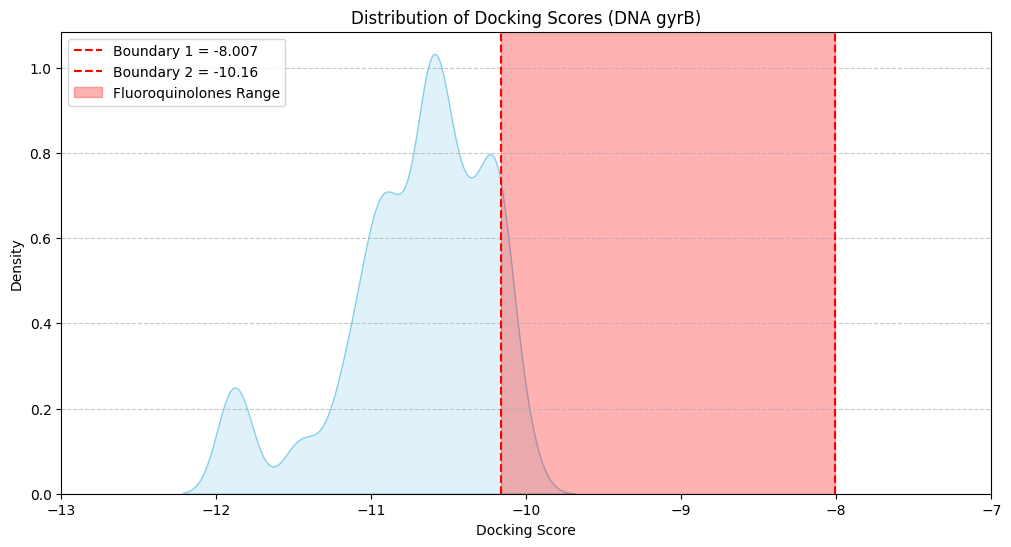

<ipython-input-32-074499385fbb>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', bw_adjust=0.5)


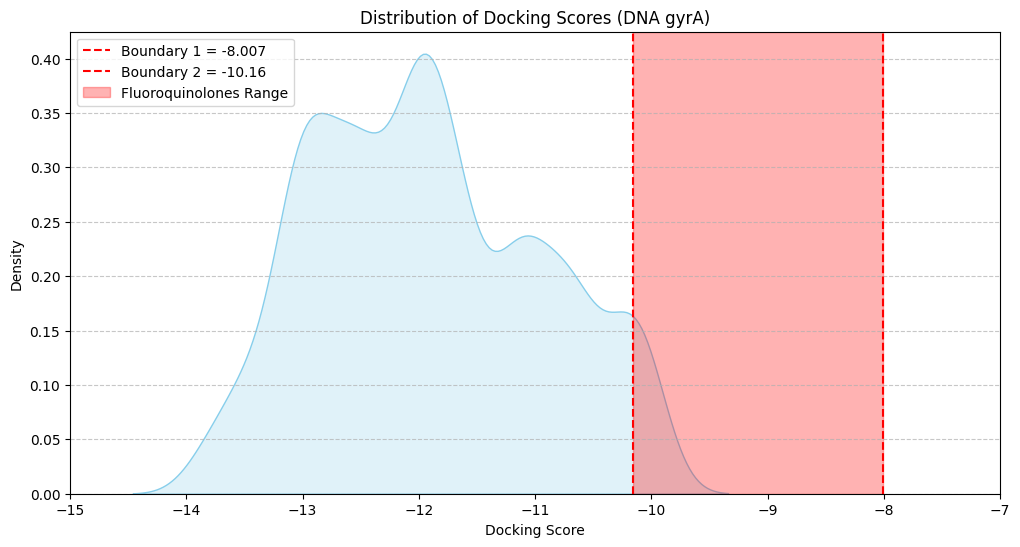

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

df = df.dropna(subset=['DockingScore1Property', 'DockingScore2Property'])

df['DockingScore1Property'] = pd.to_numeric(df['DockingScore1Property'], errors='coerce')
df['DockingScore2Property'] = pd.to_numeric(df['DockingScore2Property'], errors='coerce')

boundary1 = -8.007
boundary2 = -10.160

def plot_density(data, column, title, xlim=None):
    plt.figure(figsize=(12, 6))

    sns.kdeplot(data[column], shade=True, color='skyblue', bw_adjust=0.5)

    plt.axvline(boundary1, color='red', linestyle='--', label=f'Boundary 1 = {boundary1}')
    plt.axvline(boundary2, color='red', linestyle='--', label=f'Boundary 2 = {boundary2}')
    plt.axvspan(boundary2, boundary1, color='red', alpha=0.3, label='Fluoroquinolones Range')

    plt.title(title)
    plt.xlabel('Docking Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if xlim:
        plt.xlim(xlim)

    plt.show()

plot_density(df, 'DockingScore1Property', title="Distribution of Docking Scores (DNA gyrB)", xlim=(-13, -7))
plot_density(df, 'DockingScore2Property', title="Distribution of Docking Scores (DNA gyrA)", xlim=(-15, -7))


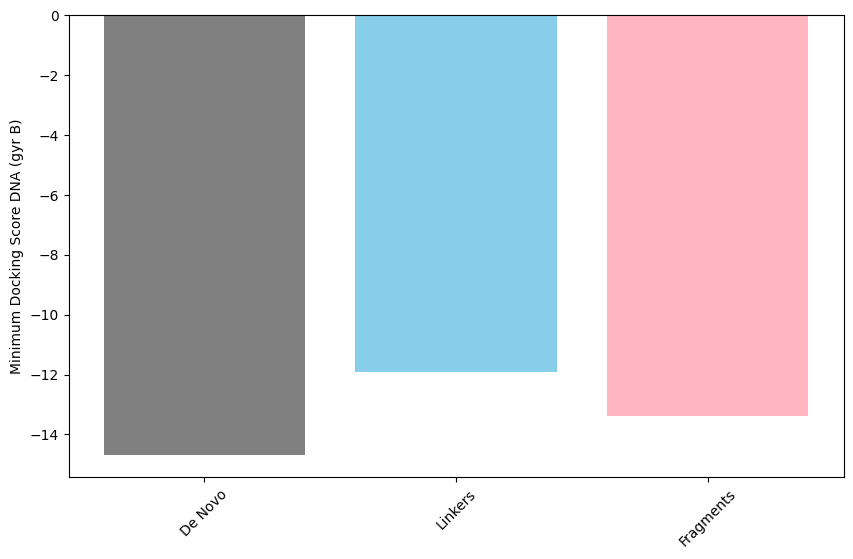

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

de_novo_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv"
linkers_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv"
fragments_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv"

#initial_df = pd.read_csv(initial_file)
de_novo_df = pd.read_csv(de_novo_file)
linkers_df = pd.read_csv(linkers_file)
fragments_df = pd.read_csv(fragments_file)

def get_min_docking_score(df, score_column='DockingScore1Property'):
    df['DockingScore1Property'] = pd.to_numeric(df['DockingScore1Property'], errors='coerce')
    return df[score_column].min()

scores = {
    #'Initial Dataset': get_min_docking_score(initial_df),
    'De Novo': get_min_docking_score(de_novo_df),
    'Linkers': get_min_docking_score(linkers_df),
    'Fragments': get_min_docking_score(fragments_df)
}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['gray', 'skyblue', 'lightpink', 'lightgreen'])
#plt.title('Minimum Docking Score across different methods')
#plt.xlabel('Approach')
plt.ylabel('Minimum Docking Score DNA (gyr B)')
plt.xticks(rotation=45)
plt.show()

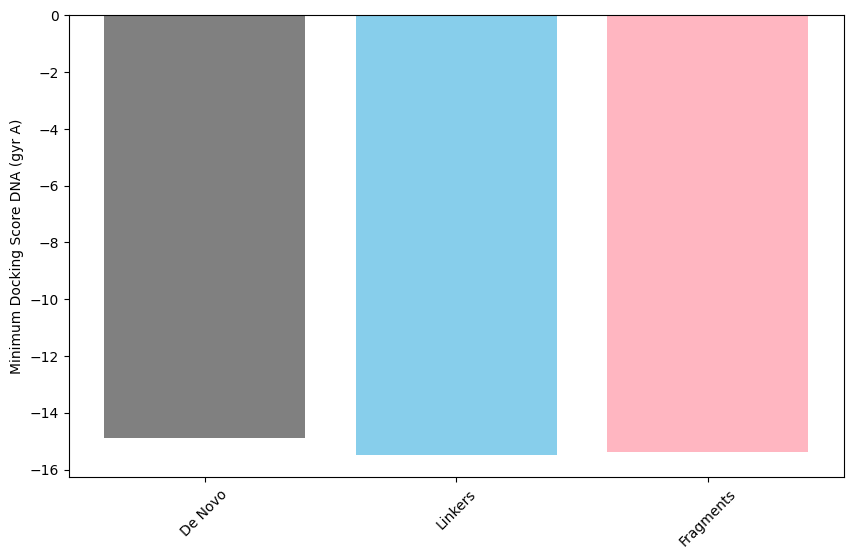

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

de_novo_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv"
linkers_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv"
fragments_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv"

#initial_df = pd.read_csv(initial_file)
de_novo_df = pd.read_csv(de_novo_file)
linkers_df = pd.read_csv(linkers_file)
fragments_df = pd.read_csv(fragments_file)

def get_min_docking_score(df, score_column='DockingScore2Property'):
    df['DockingScore2Property'] = pd.to_numeric(df['DockingScore2Property'], errors='coerce')
    return df[score_column].min()

scores = {
    #'Initial Dataset': get_min_docking_score(initial_df),
    'De Novo': get_min_docking_score(de_novo_df),
    'Linkers': get_min_docking_score(linkers_df),
    'Fragments': get_min_docking_score(fragments_df)
}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['gray', 'skyblue', 'lightpink', 'lightgreen'])
#plt.title('Minimum Docking Score across different methods')
#plt.xlabel('Approach')
plt.ylabel('Minimum Docking Score DNA (gyr A)')
plt.xticks(rotation=45)
plt.show()

De_novo

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from umap import UMAP

def get_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return None

initial_file = "/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar_rascore.csv"
generated_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv"

initial_df = pd.read_csv(initial_file)
generated_df = pd.read_csv(generated_file)

if 'fingerprint' not in initial_df.columns:
    initial_df['fingerprint'] = initial_df['smiles'].apply(get_morgan_fingerprint)  # Замените 'SMILES' на название вашей колонки с SMILES

if 'fingerprint' not in generated_df.columns:
    generated_df['fingerprint'] = generated_df['Smiles'].apply(get_morgan_fingerprint)  # Замените 'SMILES' на название вашей колонки с SMILES

initial_fingerprints = np.array(initial_df['fingerprint'].tolist())
generated_fingerprints = np.array(generated_df['fingerprint'].tolist())

scaler = StandardScaler()
initial_fingerprints = scaler.fit_transform(initial_fingerprints)
generated_fingerprints = scaler.transform(generated_fingerprints)

reducer = UMAP(n_components=2, random_state=42)
initial_2d = reducer.fit_transform(initial_fingerprints)
generated_2d = reducer.transform(generated_fingerprints)

plt.figure(figsize=(12, 8))

plt.scatter(initial_2d[:, 0], initial_2d[:, 1], c=initial_df['MIC'], cmap='viridis', s=10, label='Initial Dataset', alpha=0.7)

plt.scatter(generated_2d[:, 0], generated_2d[:, 1], c=generated_df['MIC'], cmap='coolwarm', s=10, label='Generated Molecules', alpha=0.7)

plt.colorbar(label='MIC')
plt.legend()
plt.title("UMAP with MIC")
plt.xlabel("UMAP dimension 1")
plt.ylabel("UMAP dimension 2")
plt.show()


Fragment

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from umap import UMAP

def get_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return None

initial_file = "/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar_rascore.csv"
generated_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv"

initial_df = pd.read_csv(initial_file)
generated_df = pd.read_csv(generated_file)

if 'fingerprint' not in initial_df.columns:
    initial_df['fingerprint'] = initial_df['smiles'].apply(get_morgan_fingerprint)  # Замените 'SMILES' на название вашей колонки с SMILES

if 'fingerprint' not in generated_df.columns:
    generated_df['fingerprint'] = generated_df['Smiles'].apply(get_morgan_fingerprint)  # Замените 'SMILES' на название вашей колонки с SMILES

initial_fingerprints = np.array(initial_df['fingerprint'].tolist())
generated_fingerprints = np.array(generated_df['fingerprint'].tolist())

scaler = StandardScaler()
initial_fingerprints = scaler.fit_transform(initial_fingerprints)
generated_fingerprints = scaler.transform(generated_fingerprints)

reducer = UMAP(n_components=2, random_state=42)
initial_2d = reducer.fit_transform(initial_fingerprints)
generated_2d = reducer.transform(generated_fingerprints)

plt.figure(figsize=(12, 8))

plt.scatter(initial_2d[:, 0], initial_2d[:, 1], c=initial_df['MIC'], cmap='viridis', s=10, label='Initial Dataset', alpha=0.7)

plt.scatter(generated_2d[:, 0], generated_2d[:, 1], c=generated_df['MIC'], cmap='coolwarm', s=10, label='Generated Molecules', alpha=0.7)

plt.colorbar(label='MIC')
plt.legend()
plt.title("UMAP with MIC")
plt.xlabel("UMAP dimension 1")
plt.ylabel("UMAP dimension 2")
plt.show()


Linkers

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from umap import UMAP

def get_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return None

initial_file = "/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar_rascore.csv"
generated_file = "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv"

initial_df = pd.read_csv(initial_file)
generated_df = pd.read_csv(generated_file)

if 'fingerprint' not in initial_df.columns:
    initial_df['fingerprint'] = initial_df['smiles'].apply(get_morgan_fingerprint)

if 'fingerprint' not in generated_df.columns:
    generated_df['fingerprint'] = generated_df['Smiles'].apply(get_morgan_fingerprint)

initial_fingerprints = np.array(initial_df['fingerprint'].tolist())
generated_fingerprints = np.array(generated_df['fingerprint'].tolist())

scaler = StandardScaler()
initial_fingerprints = scaler.fit_transform(initial_fingerprints)
generated_fingerprints = scaler.transform(generated_fingerprints)

reducer = UMAP(n_components=2, random_state=42)
initial_2d = reducer.fit_transform(initial_fingerprints)
generated_2d = reducer.transform(generated_fingerprints)

plt.figure(figsize=(12, 8))

plt.scatter(initial_2d[:, 0], initial_2d[:, 1], c=initial_df['MIC'], cmap='viridis', s=10, label='Initial Dataset', alpha=0.7)

plt.scatter(generated_2d[:, 0], generated_2d[:, 1], c=generated_df['MIC'], cmap='coolwarm', s=10, label='Generated Molecules', alpha=0.7)

plt.colorbar(label='MIC')
plt.legend()
plt.title("UMAP with MIC")
plt.xlabel("UMAP dimension 1")
plt.ylabel("UMAP dimension 2")
plt.show()


Analysis with the initial dataset

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from rdkit.Chem.Scaffolds import MurckoScaffold

initial_file = "/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar_rascore.csv"
generated_files = [
    "/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv",
    "/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv",
    "/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv"
]

ciprofloxacin_docking_score = -9.5  # Docking score for ciprofloxacin

def get_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return None

def calculate_sascore(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return Descriptors.SAScore(mol)
        return None
    except:
        return None

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    return None

initial_df = pd.read_csv(initial_file)
initial_df['fingerprint'] = initial_df['smiles'].apply(get_morgan_fingerprint)
initial_df['sascore'] = initial_df['smiles'].apply(calculate_sascore)
initial_df['scaffold'] = initial_df['smiles'].apply(get_scaffold)

generated_data = []
labels = ['De Novo', 'Linkers', 'Fragments']

for file in generated_files:
    df = pd.read_csv(file)
    df['fingerprint'] = df['Smiles'].apply(get_morgan_fingerprint)
    df['sascore'] = df['Smiles'].apply(calculate_sascore)
    df['scaffold'] = df['Smiles'].apply(get_scaffold)
    generated_data.append(df)

initial_scaffolds = set(initial_df['scaffold'].dropna())
for i, df in enumerate(generated_data):
    unique_scaffolds = set(df['scaffold'].dropna()) - initial_scaffolds
    print(f"Найдено {len(unique_scaffolds)} уникальных скаффолдов в {labels[i]}")

def check_lipinski(mol):
    return (Descriptors.MolWt(mol) < 500 and
            Descriptors.NumHDonors(mol) <= 5 and
            Descriptors.NumHAcceptors(mol) <= 10 and
            Descriptors.MolLogP(mol) < 5)

def check_weber(mol):
    return (Descriptors.MolWt(mol) < 700 and
            Descriptors.NumRotatableBonds(mol) <= 10 and
            Descriptors.TPSA(mol) < 140)

for i, df in enumerate(generated_data):
    df['lipinski'] = df['Smiles'].apply(lambda x: check_lipinski(Chem.MolFromSmiles(x)))
    df['weber'] = df['Smiles'].apply(lambda x: check_weber(Chem.MolFromSmiles(x)))
    lipinski_percent = df['lipinski'].mean() * 100
    weber_percent = df['weber'].mean() * 100
    print(f"{lipinski_percent:.2f}% молекул {labels[i]} соответствуют правилам Липинского")
    print(f"{weber_percent:.2f}% молекул {labels[i]} соответствуют правилам Вебера"


In [ ]:
def get_qed_column(df):
    if 'QED Score' in df.columns:
        return df['QED Score']
    elif 'QED' in df.columns:
        return df['QED']
    else:
        print("QED Score not found!")
        return None

initial_qed_col = get_qed_column(initial_df)
if initial_qed_col is not None:
    initial_avg_qed = initial_qed_col.mean()

    for i, df in enumerate(generated_data):
        qed_col = get_qed_column(df)
        if qed_col is not None:
            avg_qed = qed_col.mean()
            improvement_qed = ((avg_qed - initial_avg_qed) / initial_avg_qed) * 100
            print(f"Mean QED Score для {labels[i]} higher on {improvement_qed:.2f}%")
        else:
            print(f"QED Score not found in {labels[i]}")


Средний QED Score для De Novo выше, чем в исходном датасете, на 24.16%
Средний QED Score для Linkers выше, чем в исходном датасете, на -25.32%
Средний QED Score для Fragments выше, чем в исходном датасете, на -6.34%


In [ ]:
def get_mic_column(df):
    if 'Predicted MIC' in df.columns:
        return df['Predicted MIC']
    elif 'MIC' in df.columns:
        return df['MIC']
    else:
        print("Колонка для MIC не найдена!")
        return None

for i, df in enumerate(generated_data):
    mic_col = get_mic_column(df)
    if mic_col is not None:
        avg_pred_mic = mic_col.mean()
        min_pred_mic = mic_col.min()
        print(f"Mean MIC for {labels[i]}: {avg_pred_mic:.2f}, min: {min_pred_mic:.2f}")
    else:
        print(f"Not found in {labels[i]}")


Среднее значение MIC для De Novo: 0.29, минимальное: 0.00
Среднее значение MIC для Linkers: 0.10, минимальное: 0.00
Среднее значение MIC для Fragments: 0.25, минимальное: 0.00


In [ ]:
def get_docking_score(df, column_name):
    if column_name in df.columns:
        return df[column_name]
    else:
        print(f"Колонка {column_name} не найдена!")
        return None

for i, df in enumerate(generated_data):
    # DNA gyrB (DockingScore1Property)
    docking_score_gyrB = get_docking_score(df, 'DockingScore1Property')
    if docking_score_gyrB is not None:
        min_docking_score_gyrB = docking_score_gyrB.min()
        print(f"Минимальный докинг скор для {labels[i]} (gyrB): {min_docking_score_gyrB:.2f}")

    # DNA gyrA (DockingScore2Property)
    docking_score_gyrA = get_docking_score(df, 'DockingScore2Property')
    if docking_score_gyrA is not None:
        min_docking_score_gyrA = docking_score_gyrA.min()
        print(f"Минимальный докинг скор для {labels[i]} (gyrA): {min_docking_score_gyrA:.2f}")


In [ ]:
import pandas as pd

final_df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/final_mols.csv")
de_novo_df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv")
linkers_df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/linkers_mols.csv")
fragments_df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv")

final_df['source_file'] = None

# Создаем словари для поиска по SMILES
de_novo_set = set(de_novo_df['Smiles'])
linkers_set = set(linkers_df['Smiles'])
fragments_set = set(fragments_df['Smiles'])

for index, row in final_df.iterrows():
    smiles = row['Smiles']
    if smiles in de_novo_set:
        final_df.at[index, 'source_file'] = 'de_novo_mols.csv'
    elif smiles in linkers_set:
        final_df.at[index, 'source_file'] = 'linkers_mols.csv'
    elif smiles in fragments_set:
        final_df.at[index, 'source_file'] = 'fragment_mols.csv'
    else:
        final_df.at[index, 'source_file'] = 'not_found'

final_df.to_csv("/content/drive/MyDrive/Project/Оценка молекул/final_mols.csv", index=False)

In [ ]:
def get_avg_sascore(df):
    sascore_column = next((col for col in df.columns if 'SAScore' in col), None)
    if sascore_column is None:
        print("Колонка 'SAScore' отсутствует в наборе данных")
        return None

    df[sascore_column] = pd.to_numeric(df[sascore_column], errors='coerce')
    avg_sascore = df[sascore_column].dropna().mean()

    return avg_sascore

initial_avg_sascore = get_avg_sascore(initial_df)

if initial_avg_sascore is not None:
    for i, df in enumerate(generated_data):
        avg_sascore = get_avg_sascore(df)
        if avg_sascore is not None:
            improvement_sascore = ((initial_avg_sascore - avg_sascore) / initial_avg_sascore) * 100
            print(f"Mean SAScore для {labels[i]} better in {improvement_sascore:.2f}%")
        else:
            print(f"Not found for {labels[i]}")


Средний SAScore для De Novo лучше, чем в исходном датасете, на 67.29%
Средний SAScore для Linkers лучше, чем в исходном датасете, на 56.20%
Средний SAScore для Fragments лучше, чем в исходном датасете, на 61.01%


In [ ]:
import pandas as pd

def get_qed_column(df):
    if 'QED Score' in df.columns:
        return df['QED Score']
    elif 'QED' in df.columns:
        return df['QED']
    else:
        print("Not found!")
        return None

initial_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv')  # Замените на имя вашего исходного файла
mols_df = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/mols.csv')  # Замените на путь к вашему файлу mols.csv

initial_qed_col = get_qed_column(initial_df)
if initial_qed_col is not None:
    initial_avg_qed = initial_qed_col.mean()
    print(f"Mean QED Score for first fileа: {initial_avg_qed:.2f}")

    mols_qed_col = get_qed_column(mols_df)
    if mols_qed_col is not None:
        avg_mols_qed = mols_qed_col.mean()
        print(f"Средний QED Score для mols.csv: {avg_mols_qed:.2f}")

        improvement_qed = ((avg_mols_qed - initial_avg_qed) / initial_avg_qed) * 100
        print(f"Mean QED Score в mols.csv upper, than in initial file, in {improvement_qed:.2f}%")
    else:
        print(" QED Score not found in mols.csv")
else:
    print(" QED Score not found in initial file")

Средний QED Score для исходного файла: 0.35
Средний QED Score для mols.csv: 0.39
Средний QED Score в mols.csv выше, чем в исходном файле, на 10.27%


Analyzing the decrease of the SAScore

In [ ]:
import pandas as pd
import numpy as np

try:
    df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
    df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")
except Exception as e:
    print(f"Ошибка загрузки данных: {e}")
    raise

df_collected['mol'] = df_collected['smiles'].apply(Chem.MolFromSmiles)

df_collected['SAScore'] = df_collected['mol'].apply(check_sascore)

if not isinstance(df_collected, pd.DataFrame) or not isinstance(df_generated, pd.DataFrame):
    raise ValueError("Один из файлов не загружен корректно как таблица. Проверьте данные.")

mean_generated_sa = np.mean(df_generated['SAScore'])
mean_collected_sa = np.mean(df_collected['SAScore'])

sa_reduction = ((mean_collected_sa - mean_generated_sa) / mean_collected_sa) * 100

print(f"Средний SA Score сгенерированных молекул: {mean_generated_sa:.2f}")
print(f"Средний SA Score собранных молекул: {mean_collected_sa:.2f}")
print(f"Снижение SA Score: {sa_reduction:.2f}%")


Tanimoto similarity

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_generated = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/mols.csv")

def compute_fingerprint(smiles, radius=2, nBits=256):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
    return None

df_collected['fingerprint'] = df_collected['smiles'].apply(lambda x: compute_fingerprint(x))
df_generated['fingerprint'] = df_generated['Smiles'].apply(lambda x: compute_fingerprint(x))

df_collected = df_collected.dropna(subset=['fingerprint'])
df_generated = df_generated.dropna(subset=['fingerprint'])

similarities = []
for gen_fp in df_generated['fingerprint']:
    for coll_fp in df_collected['fingerprint']:
        sim = DataStructs.TanimotoSimilarity(gen_fp, coll_fp)
        similarities.append(sim)

mean_similarity = np.mean(similarities)

print(f"Среднее значение Tanimoto Similarity: {mean_similarity:.2f}")


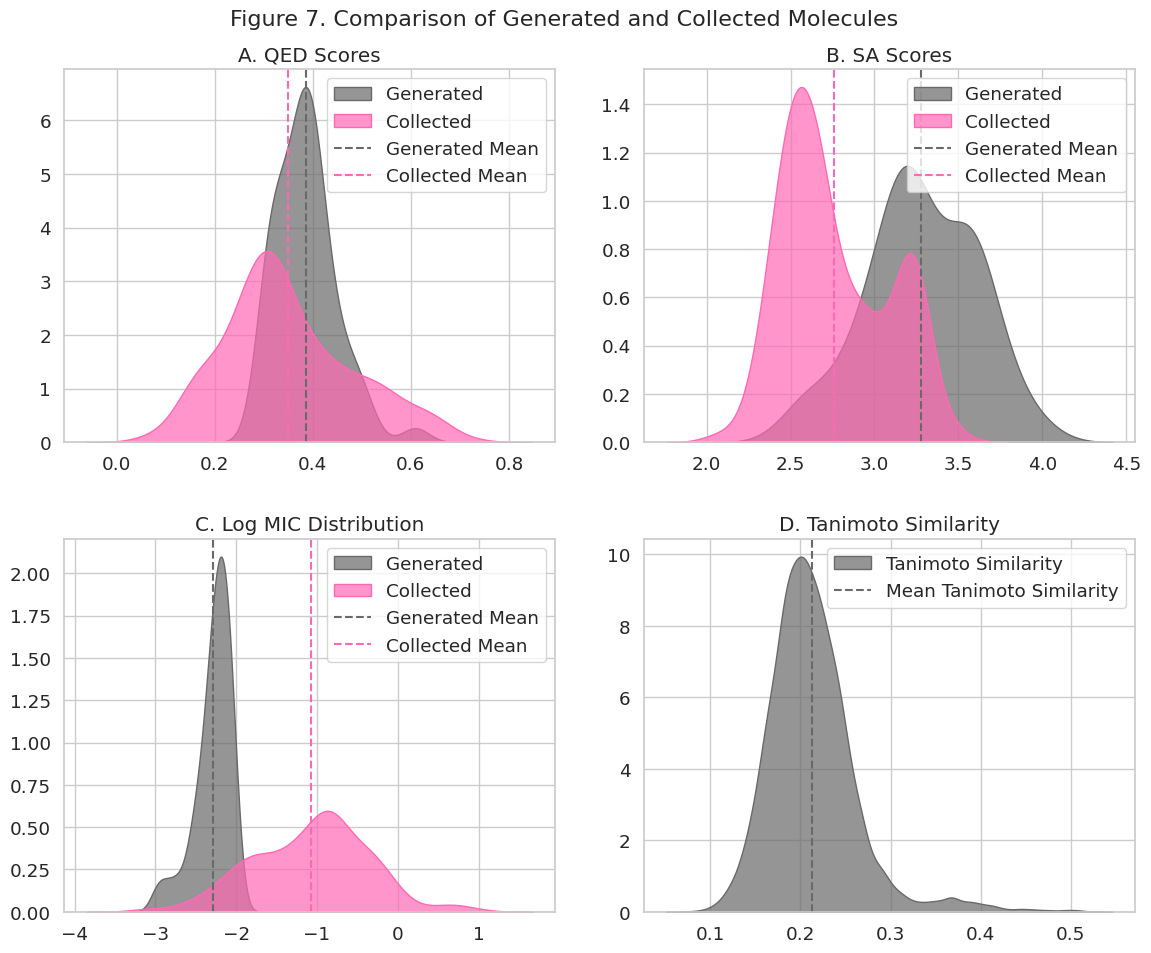

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#  7A: QED
sns.kdeplot(df_generated['QED'], label="Generated", color='dimgray', fill=True, alpha=0.7, ax=axes[0, 0])
sns.kdeplot(df_collected['QED Score'], label="Collected", color='#FF69B4', fill=True, alpha=0.7, ax=axes[0, 0])
axes[0, 0].axvline(np.mean(df_generated['QED']), color='dimgray', linestyle='--', label="Generated Mean")
axes[0, 0].axvline(np.mean(df_collected['QED Score']), color='#FF69B4', linestyle='--', label="Collected Mean")
axes[0, 0].set_title("A. QED Scores")
axes[0, 0].legend(loc='upper right', frameon=True)

#  7B: SA Scores
sns.kdeplot(df_generated['SAScore'], label="Generated", color='dimgray', fill=True, alpha=0.7, ax=axes[0, 1])
sns.kdeplot(df_collected['SAScore'], label="Collected", color='#FF69B4', fill=True, alpha=0.7, ax=axes[0, 1])
axes[0, 1].axvline(np.mean(df_generated['SAScore']), color='dimgray', linestyle='--', label="Generated Mean")
axes[0, 1].axvline(np.mean(df_collected['SAScore']), color='#FF69B4', linestyle='--', label="Collected Mean")
axes[0, 1].set_title("B. SA Scores")
axes[0, 1].legend(loc='upper right', frameon=True)

#  7C: Log MIC Distribution
mic_lower_bound = 0.0001
mic_upper_bound = 10

filtered_generated_mic = df_generated['MIC'][(df_generated['MIC'] >= mic_lower_bound) & (df_generated['MIC'] <= mic_upper_bound)]
filtered_collected_mic = df_collected['MIC'][(df_collected['MIC'] >= mic_lower_bound) & (df_collected['MIC'] <= mic_upper_bound)]

log_generated_mic = np.log10(filtered_generated_mic)
log_collected_mic = np.log10(filtered_collected_mic)

sns.kdeplot(log_generated_mic, label="Generated", color='dimgray', fill=True, alpha=0.7, ax=axes[1, 0])
sns.kdeplot(log_collected_mic, label="Collected", color='#FF69B4', fill=True, alpha=0.7, ax=axes[1, 0])
axes[1, 0].axvline(np.mean(log_generated_mic), color='dimgray', linestyle='--', label="Generated Mean")
axes[1, 0].axvline(np.mean(log_collected_mic), color='#FF69B4', linestyle='--', label="Collected Mean")
axes[1, 0].set_title("C. Log MIC Distribution")
axes[1, 0].legend(loc='upper right', frameon=True)

# 7D: Tanimoto Similarity
sns.kdeplot(similarities, label="Tanimoto Similarity", color='dimgray', fill=True, alpha=0.7, ax=axes[1, 1])
axes[1, 1].axvline(mean_similarity, color='dimgray', linestyle='--', label="Mean Tanimoto Similarity")
axes[1, 1].set_title("D. Tanimoto Similarity")
axes[1, 1].legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle("Figure 7. Comparison of Generated and Collected Molecules", fontsize=16)

for ax in axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.show()


Correcting the SAScore

In [ ]:
import sys, os
from rdkit.Chem import RDConfig
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

def check_sascore(mol):
  """ Calculates SAScore """
  return sascorer.calculateScore(mol)


In [ ]:
from rdkit import Chem
import pandas as pd

df_collected['mol'] = df_collected['smiles'].apply(Chem.MolFromSmiles)

df_collected['SAScore'] = df_collected['mol'].apply(check_sascore)

print(df_collected[['smiles', 'SAScore']].head())

In [ ]:
if not isinstance(df_collected, pd.DataFrame) or not isinstance(df_generated, pd.DataFrame):
    raise ValueError("Один из файлов не загружен корректно как таблица. Проверьте данные.")

df_generated = df_generated[df_generated['source_file'] != 'linkers_mols.csv']

mean_generated_sa = np.mean(df_generated['SAScore'])
mean_collected_sa = np.mean(df_collected['SAScore'])

sa_reduction = ((mean_collected_sa - mean_generated_sa) / mean_collected_sa) * 100

print(f"Средний SA Score сгенерированных молекул: {mean_generated_sa:.2f}")
print(f"Средний SA Score собранных молекул: {mean_collected_sa:.2f}")
print(f"Снижение SA Score: {sa_reduction:.2f}%")

Средний SA Score сгенерированных молекул: 2.90
Средний SA Score собранных молекул: 2.76
Снижение SA Score: -5.05%


Распределение results

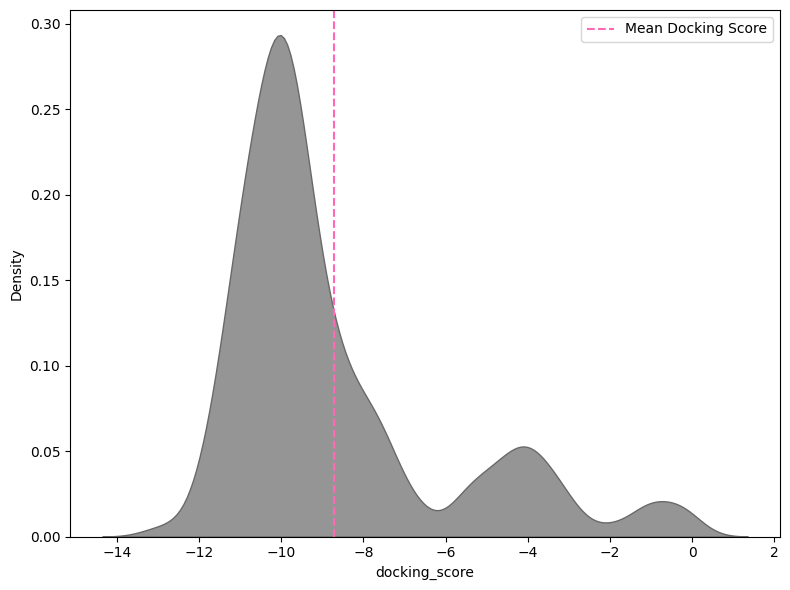

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/results.csv")

if 'docking_score' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df['docking_score'], fill=True, color='dimgray', alpha=0.7, bw_adjust=0.5)
    plt.axvline(df['docking_score'].mean(), color='#FF69B4', linestyle='--', label="Mean Docking Score")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'docking_score' not found in the dataset.")


In [ ]:
mean_docking_score = df['docking_score'].mean()
mean_docking_score

-8.716470588235294

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/results.csv")

if 'docking_score' in df.columns:
    filtered_df = df[df['docking_score'] >= -8]

    remaining_count = len(filtered_df)
    print(f"Количество молекул с docking_score >= -8: {remaining_count}")
else:
    print("Column 'docking_score' not found in the dataset.")


Количество молекул с docking_score >= -8: 43


In [ ]:
import pandas as pd

file_names = [
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv'
]

final_filtered_df = pd.DataFrame()

for file_name in file_names:
    print(f"Processing file: {file_name}")
    df = pd.read_csv(file_name)

    columns_to_convert = [
        'QED', 'MIC', 'SAScore',
        'DockingScore1Property', 'DockingScore2Property',
        'PAINSProperty', 'SureChEMBLProperty', 'GlaxoProperty'
    ]
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if 'MIC' not in df.columns and 'Predicted MIC' in df.columns:
        df['MIC'] = pd.to_numeric(df['Predicted MIC'], errors='coerce')

    filtered_df = df[
        (df['QED'] > 0.3) &
        (df['DockingScore1Property'] <= -10) &
        (df['DockingScore2Property'] <= -10) &
        (df['MIC'] < 0.01) &
        (df['SAScore'] < 4) &
        (df['BRENK'] == False) &
        (df['PAINSProperty'] == 0) &
        (df['SureChEMBLProperty'] == 0) &
        (df['GlaxoProperty'] == 0)
    ]

    final_filtered_df = pd.concat([final_filtered_df, filtered_df], ignore_index=True)

output_file = '/content/drive/MyDrive/Project/Оценка молекул/final_filtered_mols2.csv'
final_filtered_df.to_csv(output_file, index=False)

print(f"Обработано файлов: {len(file_names)}")
print(f"Итоговый файл сохранен: {output_file}")
print(f"Количество молекул, подошедших под фильтры: {len(final_filtered_df)}")


Processing file: /content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv
Processing file: /content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv
Processing file: /content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv
Обработано файлов: 3
Итоговый файл сохранен: /content/drive/MyDrive/Project/Оценка молекул/final_filtered_mols2.csv
Количество молекул, подошедших под фильтры: 652


In [ ]:
import pandas as pd

file_names = [
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv',
    '/content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv'
]

final_filtered_df = pd.DataFrame()

file_results = {}

for file_name in file_names:
    print(f"Processing file: {file_name}")
    df = pd.read_csv(file_name)

    columns_to_convert = [
        'QED', 'MIC', 'SAScore',
        'DockingScore1Property', 'DockingScore2Property',
        'PAINSProperty', 'SureChEMBLProperty', 'GlaxoProperty'
    ]
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if 'MIC' not in df.columns and 'Predicted MIC' in df.columns:
        df['MIC'] = pd.to_numeric(df['Predicted MIC'], errors='coerce')

    filtered_df = df[
        (df['QED'] > 0.3) &
        (df['DockingScore1Property'] <= -8) &
        (df['DockingScore2Property'] <= -8) &
        (df['MIC'] < 0.01) &
        (df['SAScore'] < 4) &
        (df['BRENK'] == False) &
        (df['PAINSProperty'] == 0) &
        (df['SureChEMBLProperty'] == 0) &
        (df['GlaxoProperty'] == 0)
    ]

    file_results[file_name] = len(filtered_df)

    final_filtered_df = pd.concat([final_filtered_df, filtered_df], ignore_index=True)

# output_file = '/content/drive/MyDrive/Project/Оценка молекул/final_filtered_mols2.csv'
# final_filtered_df.to_csv(output_file, index=False)

print(f"Обработано файлов: {len(file_names)}")
# print(f"Итоговый файл сохранен: {output_file}")
# print(f"Количество молекул, подошедших под фильтры: {len(final_filtered_df)}")

for file_name, count in file_results.items():
    print(f"Из файла {file_name} добавлено {count} молекул.")


Processing file: /content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv
Processing file: /content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv
Processing file: /content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv
Обработано файлов: 3
Из файла /content/drive/MyDrive/Project/Оценка молекул/Linkers/de_novo_mols.csv добавлено 703 молекул.
Из файла /content/drive/MyDrive/Project/Оценка молекул/Linkers/fragment_mols.csv добавлено 379 молекул.
Из файла /content/drive/MyDrive/Project/Оценка молекул/linkers_mols1.csv добавлено 0 молекул.


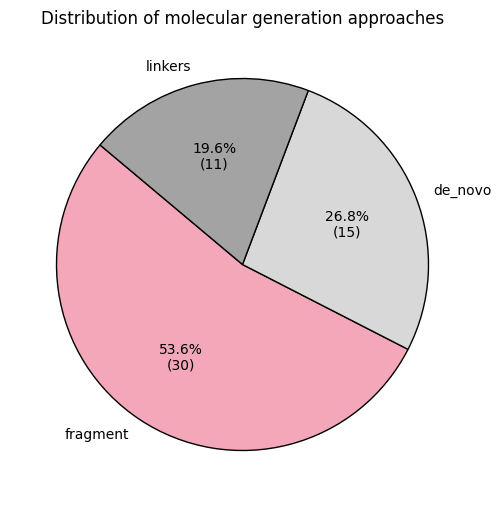

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Project/Оценка молекул/output_mols_with_approaches.csv"
df = pd.read_csv(file_path)

if 'Approaches' not in df.columns:
    print("Ошибка: В файле отсутствует колонка 'Approaches'. Убедитесь, что данные содержат методы молекулярного дизайна.")
else:
    approaches_counts = df['Approaches'].value_counts()

    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100. * sum(all_values)))
        return f'{pct:.1f}%\n({absolute})'

    plt.figure(figsize=(6, 10))
    plt.pie(
        approaches_counts,
        labels=approaches_counts.index,
        autopct=lambda pct: autopct_format(pct, approaches_counts),
        startangle=140,
        colors=['#f4a7b9', '#d8d8d8', '#a3a3a3', '#e7bcc8', '#bdbdbd'],
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title("Distribution of molecular generation approaches")
    plt.show()


Final common plots:

<ipython-input-6-a97219869836>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='SAScore', data=data, palette=['dimgray', '#FF69B4'], inner='quartile', ax=ax5)
<ipython-input-6-a97219869836>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='QED Score', data=data, palette=['dimgray', '#FF69B4'], inner='quartile', ax=ax8)


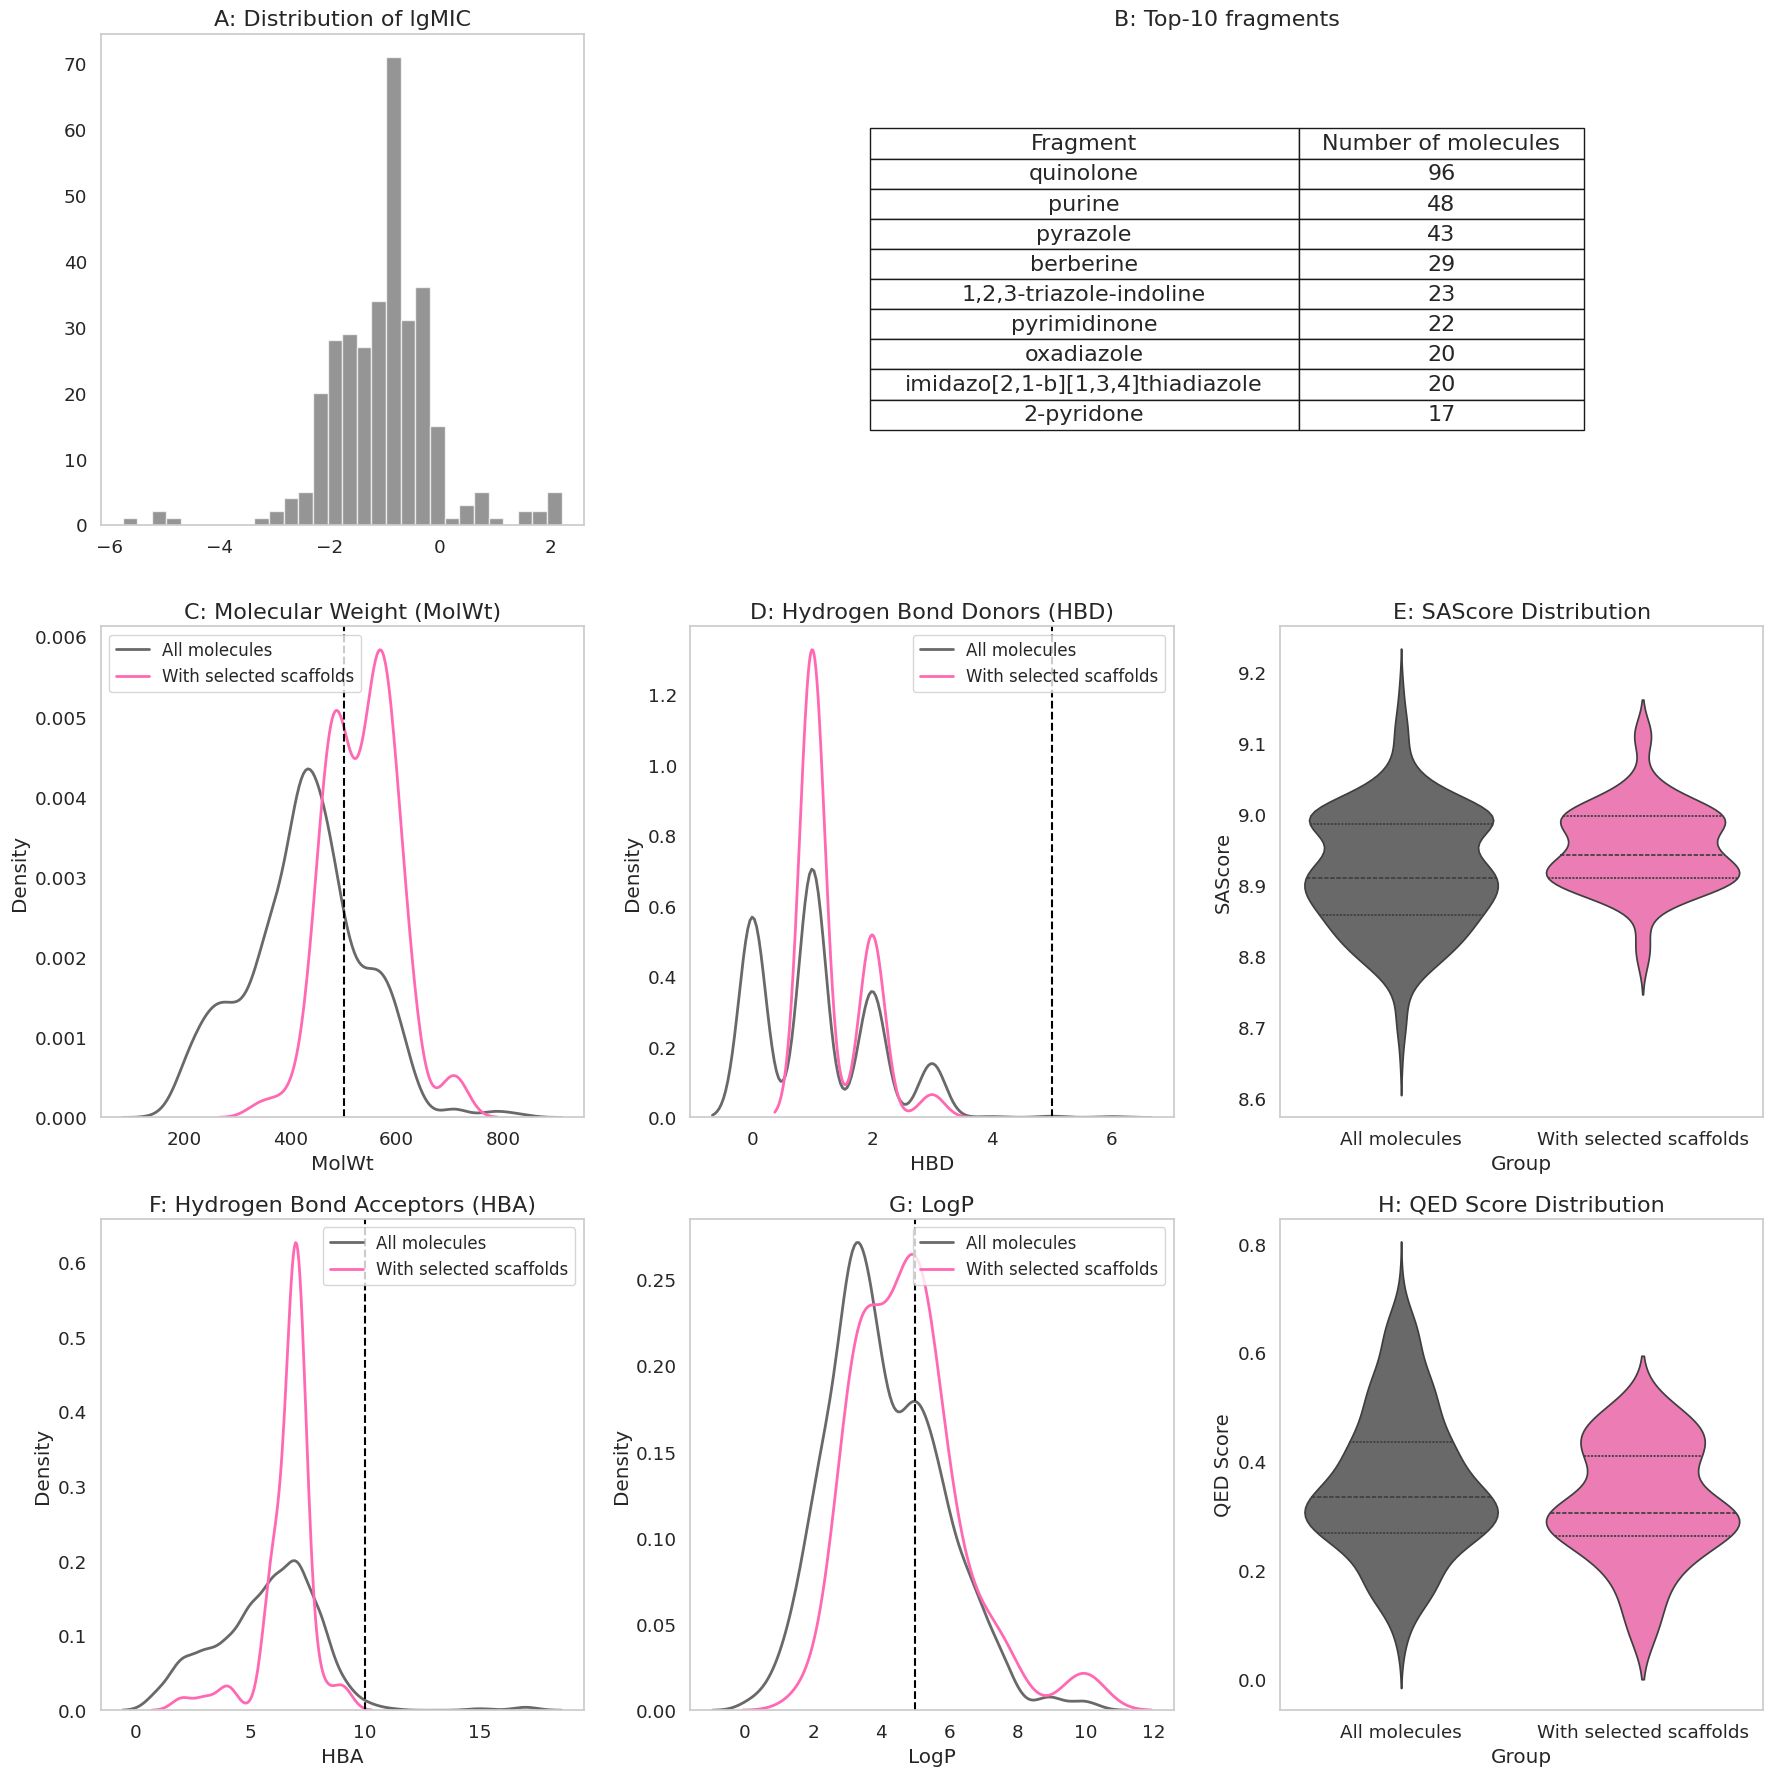

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_collected = pd.read_csv("/content/drive/MyDrive/Project/Оценка молекул/ecoli_final_dataset.csv")
df_third = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/new_Benzimidazole_dataset - new_Benzimidazole_dataset.csv')
df_fourth = pd.read_csv('/content/drive/MyDrive/Project/Оценка молекул/ecoli_qsar_rascore.csv')

sns.set(style="whitegrid", font_scale=1.2)

fig = plt.figure(figsize=(18, 18))

# Table A: lgMIC
ax1 = plt.subplot2grid((3, 3), (0, 0))
lgMIC = df_collected['MIC'].apply(lambda x: np.log10(x))
ax1.hist(lgMIC, bins=30, color='dimgray', alpha=0.7)
ax1.set_title("A: Distribution of lgMIC", fontsize=16)
axes[0, 0].set_xlabel("lgMIC, [MIC] = µmol/mL", fontsize=14)
axes[0, 0].set_ylabel("Number of molecules", fontsize=14)
ax1.grid(False)

# Table B: Top-10
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
fragments = {
    "quinolone": 96,
    "purine": 48,
    "pyrazole": 43,
    "berberine": 29,
    "1,2,3-triazole-indoline": 23,
    "pyrimidinone": 22,
    "oxadiazole": 20,
    "imidazo[2,1-b][1,3,4]thiadiazole": 20,
    "2-pyridone": 17
}
ax2.axis('off')
table_data = [[key, value] for key, value in fragments.items()]
table = ax2.table(cellText=table_data, colLabels=["Fragment", "Number of molecules"], loc="center", cellLoc='center')


table.auto_set_font_size(False)
table.set_fontsize(16)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
table.scale(1.5, 1.5)
ax2.set_title("B: Top-10 fragments", fontsize=16)

# Table C: MolWt
ax3 = plt.subplot2grid((3, 3), (1, 0))
selected_scaffolds = df_third[df_third['group_name'].str.contains('quinoline|quinolone', case=False, na=False)]
sns.kdeplot(df_third['MolWt'], color='dimgray', linewidth=2, label='All molecules', ax=ax3)
sns.kdeplot(selected_scaffolds['MolWt'], color='#FF69B4', linewidth=2, label='With selected scaffolds', ax=ax3)
ax3.axvline(500, color='black', linestyle='--')
ax3.set_title("C: Molecular Weight (MolWt)", fontsize=16)
ax3.legend(fontsize=12)
ax3.grid(False)

# Table D:  HBD
ax4 = plt.subplot2grid((3, 3), (1, 1))
sns.kdeplot(df_third['HBD'], color='dimgray', linewidth=2, label='All molecules', ax=ax4)
sns.kdeplot(selected_scaffolds['HBD'], color='#FF69B4', linewidth=2, label='With selected scaffolds', ax=ax4)
ax4.axvline(5, color='black', linestyle='--')
ax4.set_title("D: Hydrogen Bond Donors (HBD)", fontsize=16)
ax4.legend(fontsize=12)
ax4.grid(False)

# Table E: Violin plot for SAScore
ax5 = plt.subplot2grid((3, 3), (1, 2))
data = pd.DataFrame({
    'SAScore': pd.concat([df_fourth['SAScore'].dropna(), selected_scaffolds['SAScore'].dropna()]),
    'Group': ['All molecules'] * len(df_fourth['SAScore'].dropna()) + ['With selected scaffolds'] * len(selected_scaffolds['SAScore'].dropna())
})
sns.violinplot(x='Group', y='SAScore', data=data, palette=['dimgray', '#FF69B4'], inner='quartile', ax=ax5)
ax5.set_ylabel('SAScore', fontsize=14)
ax5.set_title('E: SAScore Distribution', fontsize=16)
ax5.grid(False)

# Table F:  HBA
ax6 = plt.subplot2grid((3, 3), (2, 0))
sns.kdeplot(df_third['HBA'], color='dimgray', linewidth=2, label='All molecules', ax=ax6)
sns.kdeplot(selected_scaffolds['HBA'], color='#FF69B4', linewidth=2, label='With selected scaffolds', ax=ax6)
ax6.axvline(10, color='black', linestyle='--')
ax6.set_title("F: Hydrogen Bond Acceptors (HBA)", fontsize=16)
ax6.legend(fontsize=12)
ax6.grid(False)

# Table G: LogP
ax7 = plt.subplot2grid((3, 3), (2, 1))
sns.kdeplot(df_third['LogP'], color='dimgray', linewidth=2, label='All molecules', ax=ax7)
sns.kdeplot(selected_scaffolds['LogP'], color='#FF69B4', linewidth=2, label='With selected scaffolds', ax=ax7)
ax7.axvline(5, color='black', linestyle='--')
ax7.set_title("G: LogP", fontsize=16)
ax7.legend(fontsize=12)
ax7.grid(False)

# Table H: Violin plot QED Score
ax8 = plt.subplot2grid((3, 3), (2, 2))
data['QED Score'] = pd.concat([df_fourth['QED Score'].dropna(), selected_scaffolds['QED Score'].dropna()])
sns.violinplot(x='Group', y='QED Score', data=data, palette=['dimgray', '#FF69B4'], inner='quartile', ax=ax8)
ax8.set_ylabel('QED Score', fontsize=14)
ax8.set_title('H: QED Score Distribution', fontsize=16)
ax8.grid(False)

plt.tight_layout()
plt.show()
